In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Data cleaning

In [4]:
data = pd.read_csv('CC_Modeling_Data.txt', sep='\t',header=None)


C:\Users\zhyim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data.to_csv("CC_Modelling_Data.csv", index = False)

In [ ]:
columns = pd.ExcelFile(r"CC_VariablesList.xls")

In [ ]:
data.columns = columns.parse(0).iloc[:,1]

In [ ]:
data.describe(include='all')

Var_Title,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
count,50000.000000,50000,50000.000000,50000,50000.0,50000.000000,50000,50000.00000,50000.000000,50000.0,50000,50000,50000.000000,50000,50000,50000,50000,50000,48651.000000,46223.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000,50000,16217,16217,50000,50000,50000.000000,42244.000000,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000,50000.00000,50000.0,50000.0,50000.000000
unique,NaN,1,NaN,3,NaN,NaN,4,NaN,NaN,NaN,29,9910,NaN,27,3529,14511,2,102,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,28,2236,5057,2,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1481.0,1481.0,NaN
top,NaN,C,NaN,Web,NaN,NaN,F,NaN,NaN,NaN,BA,,NaN,SP,Sao Paulo,CENTRO,Y,,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,,FORTALEZA,CENTRO,N,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,960.0,960.0,NaN
freq,NaN,50000,NaN,28206,NaN,NaN,30805,NaN,NaN,NaN,5717,2064,NaN,8773,894,4169,41809,8212,NaN,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27959,34307,419,3727,36510,36532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000,NaN,721.0,721.0,NaN
mean,25000.500000,NaN,12.869920,NaN,0.0,1.006540,NaN,2.14840,0.650520,0.0,NaN,NaN,0.961600,NaN,NaN,NaN,NaN,NaN,1.252225,9.727149,NaN,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,NaN,NaN,NaN,NaN,NaN,NaN,0.009320,8.061784,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,NaN,43.24852,NaN,NaN,0.260820
std,14433.901067,NaN,6.608385,NaN,0.0,0.080606,NaN,1.32285,1.193655,0.0,NaN,NaN,0.202105,NaN,NaN,NaN,NaN,NaN,0.867833,10.668841,NaN,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,NaN,NaN,NaN,NaN,NaN,NaN,0.383453,3.220104,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,NaN,14.98905,NaN,NaN,0.439086
min,1.000000,NaN,1.000000,NaN,0.0,1.000000,NaN,0.00000,0.000000,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,NaN,6.00000,NaN,NaN,0.000000
25%,12500.750000,NaN,10.000000,NaN,0.0,1.000000,NaN,1.00000,0.000000,0.0,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,NaN,31.00000,NaN,NaN,0.000000
50%,25000.500000,NaN,10.000000,NaN,0.0,1.000000,NaN,2.00000,0.000000,0.0,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,6.000000,NaN,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,NaN,41.00000,NaN,NaN,0.000000


In [ ]:
#drop clerk type
df=data
df=df.drop(columns='CLERK_TYPE')
df.head()

Var_Title,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [ ]:
df.describe(include='all')

Var_Title,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
count,50000.000000,50000.000000,50000,50000.0,50000.000000,50000,50000.00000,50000.000000,50000.0,50000,50000,50000.000000,50000,50000,50000,50000,50000,48651.000000,46223.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000,50000,16217,16217,50000,50000,50000.000000,42244.000000,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000,50000.00000,50000.0,50000.0,50000.000000
unique,NaN,NaN,3,NaN,NaN,4,NaN,NaN,NaN,29,9910,NaN,27,3529,14511,2,102,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,28,2236,5057,2,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1481.0,1481.0,NaN
top,NaN,NaN,Web,NaN,NaN,F,NaN,NaN,NaN,BA,,NaN,SP,Sao Paulo,CENTRO,Y,,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,,FORTALEZA,CENTRO,N,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,960.0,960.0,NaN
freq,NaN,NaN,28206,NaN,NaN,30805,NaN,NaN,NaN,5717,2064,NaN,8773,894,4169,41809,8212,NaN,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27959,34307,419,3727,36510,36532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000,NaN,721.0,721.0,NaN
mean,25000.500000,12.869920,NaN,0.0,1.006540,NaN,2.14840,0.650520,0.0,NaN,NaN,0.961600,NaN,NaN,NaN,NaN,NaN,1.252225,9.727149,NaN,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,NaN,NaN,NaN,NaN,NaN,NaN,0.009320,8.061784,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,NaN,43.24852,NaN,NaN,0.260820
std,14433.901067,6.608385,NaN,0.0,0.080606,NaN,1.32285,1.193655,0.0,NaN,NaN,0.202105,NaN,NaN,NaN,NaN,NaN,0.867833,10.668841,NaN,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,NaN,NaN,NaN,NaN,NaN,NaN,0.383453,3.220104,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,NaN,14.98905,NaN,NaN,0.439086
min,1.000000,1.000000,NaN,0.0,1.000000,NaN,0.00000,0.000000,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,NaN,6.00000,NaN,NaN,0.000000
25%,12500.750000,10.000000,NaN,0.0,1.000000,NaN,1.00000,0.000000,0.0,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,NaN,31.00000,NaN,NaN,0.000000
50%,25000.500000,10.000000,NaN,0.0,1.000000,NaN,2.00000,0.000000,0.0,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,6.000000,NaN,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,NaN,41.00000,NaN,NaN,0.000000
75%,37500.250000,15.000000,NaN,0.0,1.000000,NaN

In [ ]:
#Making payment day numeric
#df.loc[:,'PAYMENT_DAY']=df.loc[:,'PAYMENT_DAY'].astype(float)

In [ ]:
#web=0, carga=1
df['APPLICATION_SUBMISSION_TYPE']=df.loc[:,'APPLICATION_SUBMISSION_TYPE'].str.upper()
for i in range(50000):
    if df.loc[i,'APPLICATION_SUBMISSION_TYPE']=='WEB':
        df.loc[i,'APPLICATION_SUBMISSION_TYPE']=0
    elif df.loc[i,'APPLICATION_SUBMISSION_TYPE']=='CARGA':
        df.loc[i,'APPLICATION_SUBMISSION_TYPE']=1
    else:
        df.loc[i,'APPLICATION_SUBMISSION_TYPE']=np.nan

<ipython-input-9-7ad5c383cf6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['APPLICATION_SUBMISSION_TYPE']=df.loc[:,'APPLICATION_SUBMISSION_TYPE'].str.upper()
C:\Users\zhyim\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df.loc[:,'APPLICATION_SUBMISSION_TYPE']=df.loc[:,'APPLICATION_SUBMISSION_TYPE'].astype(float)

C:\Users\zhyim\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
#quant additional card
df=df.drop(columns='QUANT_ADDITIONAL_CARDS')

In [ ]:
#drop postal address type
df.loc[:,'POSTAL_ADDRESS_TYPE']=df.loc[:,'POSTAL_ADDRESS_TYPE'].astype(float)

In [ ]:
#sex M=0,F=1
df['SEX']=df.loc[:,'SEX'].str.upper()
for i in range(50000):
    if df.loc[i,'SEX']=='M':
        df.loc[i,'SEX']=0
    elif df.loc[i,'SEX']=='F':
        df.loc[i,'SEX']=1
    else:
        df.loc[i,'SEX']=np.nan

In [ ]:
df.loc[:,'SEX']=df.loc[:,'SEX'].astype(float)

In [ ]:
#MARITAL STATUS needs more work after splitting
#df=df.drop(columns='MARITAL_STATUS')
df.loc[:,'MARITAL_STATUS']=df.loc[:,'MARITAL_STATUS'].astype(str)
for i in range(50000):
    if df.loc[i,'MARITAL_STATUS']=='0':
        df.loc[i,'MARITAL_STATUS']=np.nan

In [ ]:
#drop Education level(duplicate and too many missing)
df=df.drop(columns='EDUCATION_LEVEL')

In [ ]:
#STATE_OF_BIRTH needs work after splitting
#df['STATE_OF_BIRTH']=df.loc[:,'STATE_OF_BIRTH'].str.upper()
#c = df.groupby(['STATE_OF_BIRTH'])['TARGET_LABEL_BAD=1'].mean().sort_values()
#c

#replace empty strings with 'NA'
for i in range(50000):
    if not df.loc[i,'STATE_OF_BIRTH'].strip():
        df.loc[i,'STATE_OF_BIRTH']='NA'

In [ ]:
#for i in range(50000):
#    if df.loc[i,'STATE_OF_BIRTH'] in c.index[:9]:
#        df.loc[i,'STATE_OF_BIRTH']=float(3)
#    elif df.loc[i,'STATE_OF_BIRTH'] in c.index[9:19]:
#        df.loc[i,'STATE_OF_BIRTH']=float(2)
#    else:
#        df.loc[i,'STATE_OF_BIRTH']=float(1)

In [ ]:
#df.loc[:,'STATE_OF_BIRTH']=df.loc[:,'STATE_OF_BIRTH'].astype(float)
#df.describe(include='all')

In [ ]:
#drop CITY_OF_BIRTH (too many empty strings)
df=df.drop(columns='CITY_OF_BIRTH')

In [ ]:
#NACIONALITY  brazil=1, foreign=0
df.loc[:,'NACIONALITY']=df.loc[:,'NACIONALITY'].astype(int)
for i in range(50000):
    if df.loc[i,'NACIONALITY']==1:
        df.loc[i,'NACIONALITY']=1
    elif df.loc[i,'NACIONALITY']==0:
        df.loc[i,'NACIONALITY']=0
    elif df.loc[i,'NACIONALITY']==2:
        df.loc[i,'NACIONALITY']=0
    else:
        df.loc[i,'NACIONALITY']=np.nan

In [ ]:
#drop RESIDENCIAL_BOROUGH(needs more work after spliting)
#df=df.drop(columns='RESIDENCIAL_BOROUGH')
for i in range(50000):
    if not df.loc[i,'RESIDENCIAL_BOROUGH'].strip():
        df.loc[i,'RESIDENCIAL_BOROUGH']='NA'

In [ ]:
#FLAG_RESIDENCIAL_PHONE Y=1, N=0
df['FLAG_RESIDENCIAL_PHONE']=df.loc[:,'FLAG_RESIDENCIAL_PHONE'].str.upper()
for i in range(50000):
    if df.loc[i,'FLAG_RESIDENCIAL_PHONE']=='N':
        df.loc[i,'FLAG_RESIDENCIAL_PHONE']=0
    elif df.loc[i,'FLAG_RESIDENCIAL_PHONE']=='Y':
        df.loc[i,'FLAG_RESIDENCIAL_PHONE']=1
    else:
        df.loc[i,'FLAG_RESIDENCIAL_PHONE']=np.nan

In [ ]:
df.loc[:,'FLAG_RESIDENCIAL_PHONE']=df.loc[:,'FLAG_RESIDENCIAL_PHONE'].astype(float)

In [ ]:
#drop RESIDENCIAL_PHONE_AREA_CODE(Not helpful, hard to conclude, too many missing)
df=df.drop(columns='RESIDENCIAL_PHONE_AREA_CODE')

In [ ]:
#RESIDENCE_TYPE (needs work after splitting)
#df.loc[:,'RESIDENCE_TYPE']=df.loc[:,'RESIDENCE_TYPE'].astype(float)
for i in range(50000):
    if df.loc[i,'RESIDENCE_TYPE']==0:
        df.loc[i,'RESIDENCE_TYPE']=np.nan

In [ ]:
#MONTHS_IN_RESIDENCE (needs work after splitting)
df.loc[:,'MONTHS_IN_RESIDENCE']=df.loc[:,'MONTHS_IN_RESIDENCE'].astype(float)

In [ ]:
#drop FLAG_MOBILE_PHONE (all of them are 'N')
df=df.drop(columns='FLAG_MOBILE_PHONE')

In [ ]:
#FLAG_EMAIL
df.loc[:,'FLAG_EMAIL']=df.loc[:,'FLAG_EMAIL'].astype(float)

In [ ]:
#PERSONAL_MONTHLY_INCOME
df.loc[:,'PERSONAL_MONTHLY_INCOME']=df.loc[:,'PERSONAL_MONTHLY_INCOME'].astype(float)

In [ ]:
#OTHER_INCOMES
df.loc[:,'OTHER_INCOMES']=df.loc[:,'OTHER_INCOMES'].astype(float)

In [ ]:
#FLAG_VISA
df.loc[:,'FLAG_VISA']=df.loc[:,'FLAG_VISA'].astype(float)

In [ ]:
#FLAG_MASTERCARD
df.loc[:,'FLAG_MASTERCARD']=df.loc[:,'FLAG_MASTERCARD'].astype(float)

In [ ]:
#FLAG_DINERS
df.loc[:,'FLAG_DINERS']=df.loc[:,'FLAG_DINERS'].astype(float)

In [ ]:
#FLAG_AMERICAN_EXPRESS
df.loc[:,'FLAG_AMERICAN_EXPRESS']=df.loc[:,'FLAG_AMERICAN_EXPRESS'].astype(float)

In [ ]:
#FLAG_OTHER_CARDS
df.loc[:,'FLAG_OTHER_CARDS']=df.loc[:,'FLAG_OTHER_CARDS'].astype(float)

In [ ]:
#QUANT_BANKING_ACCOUNTS
df.loc[:,'QUANT_BANKING_ACCOUNTS']=df.loc[:,'QUANT_BANKING_ACCOUNTS'].astype(float)

In [ ]:
#QUANT_SPECIAL_BANKING_ACCOUNTS
df.loc[:,'QUANT_SPECIAL_BANKING_ACCOUNTS']=df.loc[:,'QUANT_SPECIAL_BANKING_ACCOUNTS'].astype(float)

In [ ]:
#PERSONAL_ASSETS_VALUE
df.loc[:,'PERSONAL_ASSETS_VALUE']=df.loc[:,'PERSONAL_ASSETS_VALUE'].astype(float)

In [ ]:
#QUANT_CARS
df.loc[:,'QUANT_CARS']=df.loc[:,'QUANT_CARS'].astype(float)

In [ ]:
#COMPANY Y=1, N=0
df['COMPANY']=df.loc[:,'COMPANY'].str.upper()
for i in range(50000):
    if df.loc[i,'COMPANY']=='N':
        df.loc[i,'COMPANY']=float(0)
    elif df.loc[i,'COMPANY']=='Y':
        df.loc[i,'COMPANY']=float(1)
    else:
        df.loc[i,'COMPANY']=np.nan

In [ ]:
df.loc[:,'COMPANY']=df.loc[:,'COMPANY'].astype(float)

In [ ]:
#drop PROFESSIONAL_STATE (most are blank)
df=df.drop(columns='PROFESSIONAL_STATE')

In [ ]:
#drop PROFESSIONAL_CITY (a lot of them are missing)
df=df.drop(columns='PROFESSIONAL_CITY')

In [ ]:
#drop PROFESSIONAL_BOROUGH for the same reason
df=df.drop(columns='PROFESSIONAL_BOROUGH')

In [ ]:
#FLAG_PROFESSIONAL_PHONE N=0, Y=1
df['FLAG_PROFESSIONAL_PHONE']=df.loc[:,'FLAG_PROFESSIONAL_PHONE'].str.upper()
for i in range(50000):
    if df.loc[i,'FLAG_PROFESSIONAL_PHONE']=='N':
        df.loc[i,'FLAG_PROFESSIONAL_PHONE']=float(0)
    elif df.loc[i,'FLAG_PROFESSIONAL_PHONE']=='Y':
        df.loc[i,'FLAG_PROFESSIONAL_PHONE']=float(1)
    else:
        df.loc[i,'FLAG_PROFESSIONAL_PHONE']=np.nan

In [ ]:
df.loc[:,'FLAG_PROFESSIONAL_PHONE']=df.loc[:,'FLAG_PROFESSIONAL_PHONE'].astype(float)

In [ ]:
#drop PROFESSIONAL_PHONE_AREA_CODE (a lot of them are missing and hard to conclude)
df=df.drop(columns='PROFESSIONAL_PHONE_AREA_CODE')

In [ ]:
#MONTHS_IN_THE_JOB
df.loc[:,'MONTHS_IN_THE_JOB']=df.loc[:,'MONTHS_IN_THE_JOB'].astype(float)

In [ ]:
#PROFESSION_CODE (also needs work after splitting)
df.loc[:,'PROFESSION_CODE']=df.loc[:,'PROFESSION_CODE'].astype(float)

In [ ]:
#OCCUPATION_TYPE(needs work after splitting)
df.loc[:,'OCCUPATION_TYPE']=df.loc[:,'OCCUPATION_TYPE'].astype(float)

In [ ]:
#drop MATE_PROFESSION_CODE (too many missing)
df=df.drop(columns='MATE_PROFESSION_CODE')

In [ ]:
#FLAG_HOME_ADDRESS_DOCUMENT(all 0)
df=df.drop(columns='FLAG_HOME_ADDRESS_DOCUMENT')

In [ ]:
#FLAG_RG(for the same reason)
df=df.drop(columns='FLAG_RG')

In [ ]:
#FLAG_CPF(same reason)
df=df.drop(columns='FLAG_CPF')

In [ ]:
#FLAG_INCOME_PROOF(same reason)
df=df.drop(columns='FLAG_INCOME_PROOF')

In [ ]:
#PRODUCT (Change level 7 to 3)
df.loc[:,'PRODUCT']=df.loc[:,'PRODUCT'].astype(float)
for i in range(50000):
    if df.loc[i,'PRODUCT']==7.0:
        df.loc[i,'PRODUCT']=float(3)

In [ ]:
#FLAG_ACSP_RECORD(all N)
df=df.drop(columns='FLAG_ACSP_RECORD')

In [ ]:
#Age
df.loc[:,'AGE']=df.loc[:,'AGE'].astype(float)

In [ ]:
#RESIDENCIAL_ZIP_3 (have something other than number and null, need modify one by one)
df.loc[:,'RESIDENCIAL_ZIP_3']=df.loc[:,'RESIDENCIAL_ZIP_3'].astype(str)
for i in range(50000):
    if not df.loc[i,'RESIDENCIAL_ZIP_3'].isdigit():
        df.loc[i,'RESIDENCIAL_ZIP_3']=np.nan

In [ ]:
#PROFESSIONAL_ZIP_3
df.loc[:,'PROFESSIONAL_ZIP_3']=df.loc[:,'PROFESSIONAL_ZIP_3'].astype(str)
for i in range(50000):
    if not df.loc[i,'PROFESSIONAL_ZIP_3'].isdigit():
        df.loc[i,'PROFESSIONAL_ZIP_3']=np.nan

In [ ]:
#TARGET_LABEL_BAD=1
df.loc[:,'TARGET_LABEL_BAD=1']=df.loc[:,'TARGET_LABEL_BAD=1'].astype(float)

In [ ]:
display(df)

Var_Title,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,5,0.0,1.0,1.0,6,1,RN,1,RN,Santana do Matos,Centro,1.0,1.0,15.0,1.0,900.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,1.0,32.0,595,595,1.0
1,2,15,1.0,1.0,1.0,2,0,RJ,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,1.0,1.0,1.0,1.0,750.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,4.0,1.0,34.0,230,230,1.0
2,3,5,0.0,1.0,1.0,2,0,RN,1,RN,Parnamirim,Boa Esperanca,1.0,1.0,NaN,1.0,500.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,1.0,27.0,591,591,0.0
3,4,20,0.0,1.0,1.0,2,0,PE,1,PE,CABO,PONTE DOS CARVALHOS,0.0,NaN,NaN,1.0,500.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,61.0,545,545,0.0
4,5,10,0.0,1.0,0.0,2,0,RJ,1,RJ,Rio de Janeiro,Santa Cruz,1.0,1.0,12.0,1.0,1200.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,1.0,48.0,235,235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,10,NaN,1.0,1.0,1,2,RN,1,RN,NATAL,PAJUCARA,1.0,1.0,14.0,1.0,1451.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,4.0,1.0,36.0,591,591,1.0
49996,49997,25,NaN,1.0,1.0,1,0,SP,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,1.0,1.0,15.0,1.0,450.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,21.0,186,186,0.0
49997,49998,5,0.0,1.0,0.0,2,3,PR,1,SP,GUARULHOS,jardim vida nova,1.0,2.0,5.0,1.0,1555.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9.0,2.0,1.0,41.0,715,715,0.0
49998,49999,1,0.0,1.0,1.0,1,1,SP,1,MG,CONTAGEM,VILA BELEM,1.0,1.0,NaN,1.0,1443.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9.0,2.0,1.0,28.0,320,320,1.0


In [ ]:
df.describe(include='all')

Var_Title,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
count,50000.000000,50000.000000,30539.000000,50000.000000,49935.000000,49798,50000.000000,50000,50000.00000,50000,50000,50000,50000.000000,47891.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.00000,50000.00000,50000.000000,42244.000000,42687.000000,50000.000000,50000.00000,49999,49999,50000.000000
unique,NaN,NaN,NaN,NaN,NaN,7,NaN,29,NaN,27,3529,14511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,793,793,NaN
top,NaN,NaN,NaN,NaN,NaN,2,NaN,BA,NaN,SP,Sao Paulo,CENTRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960,960,NaN
freq,NaN,NaN,NaN,NaN,NaN,25967,NaN,5717,NaN,8773,894,4169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085,1085,NaN
mean,25000.500000,12.869920,0.076394,1.006540,0.616902,NaN,0.650520,NaN,0.95768,NaN,NaN,NaN,0.836180,1.272097,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.44082,0.26980,0.009320,8.061784,2.484316,1.172100,43.24852,NaN,NaN,0.260820
std,14433.901067,6.608385,0.265632,0.080606,0.486147,NaN,1.193655,NaN,0.20132,NaN,NaN,NaN,0.370116,0.860120,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.49649,0.44386,0.383453,3.220104,1.532261,0.440778,14.98905,NaN,NaN,0.439086
min,1.000000,1.000000,0.000000,1.000000,0.000000,NaN,0.000000,NaN,0.00000,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000,6.00000,NaN,NaN,0.000000
25%,12500.750000,10.000000,0.000000,1.000000,0.000000,NaN,0.000000,NaN,1.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.00000,0.000000,9.000000,1.000000,1.000000,31.00000,NaN,NaN,0.000000
50%,25000.500000,10.000000,0.000000,1.000000,1.000000,NaN,0.000000,NaN,1.00000,NaN,NaN,NaN,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.00000,0.000000,9.000000,2.000000,1.000000,41.00000,NaN,NaN,0.000000
75%,37500.250000,15.000000,0.000000,1.000000,1.000000,NaN,1.000000,NaN,1.00000,NaN,NaN,NaN,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.00000,1.00000,0.000000,9.000000,4.000000,1.000000,53.00000,NaN,NaN,1.000000


Now we have the dataframe left with clear numeric value. We need to delete more variables before split it into test and train dataset. From the describe table, we noticed that we might want to drop some variables based on the description. APPLICATION_SUBMISSION_TYPE with too many missing value (>>1%),OCCUPATION_TYPE and PROFESSION_CODE with too many missing values. We drop PROFESSIONAL_ZIP_3 as well, because it has the same information as the residencial one.

In [ ]:
df=df.drop(columns='APPLICATION_SUBMISSION_TYPE')
df=df.drop(columns='OCCUPATION_TYPE')
df=df.drop(columns='PROFESSION_CODE')
df=df.drop(columns='PROFESSIONAL_ZIP_3')

In [ ]:
display(df)

Var_Title,ID_CLIENT,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,5,1.0,1.0,6,1,RN,1,RN,Santana do Matos,Centro,1.0,1.0,15.0,1.0,900.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,595,1.0
1,2,15,1.0,1.0,2,0,RJ,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,1.0,1.0,1.0,1.0,750.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,34.0,230,1.0
2,3,5,1.0,1.0,2,0,RN,1,RN,Parnamirim,Boa Esperanca,1.0,1.0,NaN,1.0,500.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,591,0.0
3,4,20,1.0,1.0,2,0,PE,1,PE,CABO,PONTE DOS CARVALHOS,0.0,NaN,NaN,1.0,500.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0,545,0.0
4,5,10,1.0,0.0,2,0,RJ,1,RJ,Rio de Janeiro,Santa Cruz,1.0,1.0,12.0,1.0,1200.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,10,1.0,1.0,1,2,RN,1,RN,NATAL,PAJUCARA,1.0,1.0,14.0,1.0,1451.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,36.0,591,1.0
49996,49997,25,1.0,1.0,1,0,SP,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,1.0,1.0,15.0,1.0,450.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,21.0,186,0.0
49997,49998,5,1.0,0.0,2,3,PR,1,SP,GUARULHOS,jardim vida nova,1.0,2.0,5.0,1.0,1555.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,41.0,715,0.0
49998,49999,1,1.0,1.0,1,1,SP,1,MG,CONTAGEM,VILA BELEM,1.0,1.0,NaN,1.0,1443.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,28.0,320,1.0


In [ ]:
df.describe(include='all')

Var_Title,ID_CLIENT,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
count,50000.000000,50000.000000,50000.000000,49935.000000,49798,50000.000000,50000,50000.00000,50000,50000,50000,50000.000000,47891.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,49999,50000.000000
unique,NaN,NaN,NaN,NaN,7,NaN,29,NaN,27,3529,14511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,793,NaN
top,NaN,NaN,NaN,NaN,2,NaN,BA,NaN,SP,Sao Paulo,CENTRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960,NaN
freq,NaN,NaN,NaN,NaN,25967,NaN,5717,NaN,8773,894,4169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085,NaN
mean,25000.500000,12.869920,1.006540,0.616902,NaN,0.650520,NaN,0.95768,NaN,NaN,NaN,0.836180,1.272097,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.44082,0.26980,0.009320,1.172100,43.24852,NaN,0.260820
std,14433.901067,6.608385,0.080606,0.486147,NaN,1.193655,NaN,0.20132,NaN,NaN,NaN,0.370116,0.860120,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.49649,0.44386,0.383453,0.440778,14.98905,NaN,0.439086
min,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,NaN,0.00000,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.00000,0.000000,1.000000,6.00000,NaN,0.000000
25%,12500.750000,10.000000,1.000000,0.000000,NaN,0.000000,NaN,1.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.00000,0.000000,1.000000,31.00000,NaN,0.000000
50%,25000.500000,10.000000,1.000000,1.000000,NaN,0.000000,NaN,1.00000,NaN,NaN,NaN,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.00000,0.000000,1.000000,41.00000,NaN,0.000000
75%,37500.250000,15.000000,1.000000,1.000000,NaN,1.000000,NaN,1.00000,NaN,NaN,NaN,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.00000,1.00000,0.000000,1.000000,53.00000,NaN,1.000000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scorecardpy as sc
%matplotlib inline

In [ ]:
train, test = sc.split_df(df.iloc[:,1:],
                          y = 'TARGET_LABEL_BAD=1',
                          ratio = 0.7,
                          seed = 251238783).values()

### TRAIN Missing Value

In [ ]:
train.isnull().any()

Var_Title
PAYMENT_DAY                       False
POSTAL_ADDRESS_TYPE               False
SEX                                True
MARITAL_STATUS                     True
QUANT_DEPENDANTS                  False
STATE_OF_BIRTH                    False
NACIONALITY                       False
RESIDENCIAL_STATE                 False
RESIDENCIAL_CITY                  False
RESIDENCIAL_BOROUGH               False
FLAG_RESIDENCIAL_PHONE            False
RESIDENCE_TYPE                     True
MONTHS_IN_RESIDENCE                True
FLAG_EMAIL                        False
PERSONAL_MONTHLY_INCOME           False
OTHER_INCOMES                     False
FLAG_VISA                         False
FLAG_MASTERCARD                   False
FLAG_DINERS                       False
FLAG_AMERICAN_EXPRESS             False
FLAG_OTHER_CARDS                  False
QUANT_BANKING_ACCOUNTS            False
QUANT_SPECIAL_BANKING_ACCOUNTS    False
PERSONAL_ASSETS_VALUE             False
QUANT_CARS                    

In [ ]:
train.describe(include='all')

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
count,35000.000000,35000.000000,34955.000000,34869,35000.000000,35000,35000.000000,35000,35000,35000,35000.000000,33535.000000,32343.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.0000,35000.000000,35000.000000,34999,35000.000000
unique,NaN,NaN,NaN,7,NaN,29,NaN,27,3023,11579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763,NaN
top,NaN,NaN,NaN,2,NaN,BA,NaN,SP,FORTALEZA,CENTRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960,NaN
freq,NaN,NaN,NaN,18277,NaN,4022,NaN,6157,612,2942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN
mean,12.861486,1.006800,0.619168,NaN,0.657486,NaN,0.957486,NaN,NaN,NaN,0.835543,1.274907,9.723217,0.803771,923.880094,31.585403,0.111400,0.096657,0.001457,0.001571,0.001971,0.357771,0.357771,2.401439e+03,0.335543,0.440200,0.270343,0.0094,1.173057,43.180229,NaN,0.260829
std,6.613217,0.082182,0.485598,NaN,1.176888,NaN,0.201762,NaN,NaN,NaN,0.370695,0.866131,10.699172,0.397149,9108.778645,195.674286,0.314631,0.295495,0.038145,0.039611,0.044358,0.479887,0.479887,4.885616e+04,0.472187,0.496418,0.444143,0.4015,0.441717,14.953427,NaN,0.439093
min,1.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,6.000000,NaN,0.000000
25%,10.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,31.000000,NaN,0.000000
50%,10.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,41.000000,NaN,0.000000
75%,15.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.0000,1.000000,53.000000,NaN,1.000000


We are starting by cleaning the train dataset

In [ ]:
train.loc[train.isnull().any(axis = 1), :]

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
2,5,1.0,1.0,2,0,RN,1,RN,Parnamirim,Boa Esperanca,1.0,1.0,NaN,1.0,500.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,591,0.0
3,20,1.0,1.0,2,0,PE,1,PE,CABO,PONTE DOS CARVALHOS,0.0,NaN,NaN,1.0,500.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0,545,0.0
21,10,1.0,0.0,1,3,CE,1,CE,PACATUBA,JEREISSATE II,1.0,1.0,NaN,1.0,612.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,69.0,618,0.0
41,15,1.0,1.0,2,0,MG,1,MG,montes claros,c joaquim costa,1.0,1.0,NaN,1.0,380.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,45.0,394,1.0
64,10,1.0,1.0,2,1,BA,1,GO,INDIARA,SAO SIMAO,0.0,1.0,NaN,1.0,379.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,42.0,759,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49918,15,1.0,1.0,2,2,PA,1,DF,PARANOA,DEL LAGO,1.0,NaN,1.0,1.0,350.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,715,0.0
49942,25,1.0,1.0,1,2,MS,1,MS,CAMPO GRANDE,RESIDENCIA OLIVEIRA,1.0,NaN,1.0,1.0,570.00,350.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,47.0,790,1.0
49953,10,1.0,0.0,2,1,BA,1,BA,camacari,ficam II,1.0,1.0,NaN,1.0,772.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,30.0,428,0.0
49959,10,1.0,1.0,2,1,PE,1,PE,Jaboatao dos Guararapes,Sucupira,1.0,1.0,NaN,1.0,600.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,542,0.0


In [ ]:
#we starting by cleaning the SEX variable. 
#Note, from the description, we have an mean for sex is above 0.6, hence the mode of this data is 1
#We replace the missing value by 1
train.SEX.fillna(value = 1, inplace=True)

In [ ]:
train.loc[:,'MARITAL_STATUS'].mode()

0    2
dtype: object

In [ ]:
#For MARITAL_STATUS we need to treat all 0 as NaN, since we dont have a category of 0 for this one.
train.MARITAL_STATUS.fillna(value = '2', inplace=True)

In [ ]:
#For RESIDENCE_TYPE
#train.RESIDENCE_TYPE.fillna(train.RESIDENCE_TYPE.mode(), inplace=True)
train.RESIDENCE_TYPE.mode()

0    1.0
dtype: float64

In [ ]:
train.loc[:,'RESIDENCE_TYPE']=train.loc[:,'RESIDENCE_TYPE'].astype(float)
train.RESIDENCE_TYPE.fillna(value=float(1), inplace=True)

In [ ]:
train.MONTHS_IN_RESIDENCE.median()

6.0

In [ ]:
#Now for the MONTHS_IN_RESIDENCE, we replace the missing value by the median
train.MONTHS_IN_RESIDENCE.fillna(value=6, inplace=True)

In [ ]:
train.RESIDENCIAL_ZIP_3.mode()

0    960
dtype: object

In [ ]:
#Now for the RESIDENCIAL_ZIP_3, we replace the missing value by the median
train.RESIDENCIAL_ZIP_3.fillna(value='960', inplace=True)

In [ ]:
train.describe(include='all')

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
count,35000.000000,35000.000000,35000.000000,35000,35000.000000,35000,35000.000000,35000,35000,35000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.0000,35000.000000,35000.000000,35000,35000.000000
unique,NaN,NaN,NaN,7,NaN,29,NaN,27,3023,11579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763,NaN
top,NaN,NaN,NaN,2,NaN,BA,NaN,SP,FORTALEZA,CENTRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960,NaN
freq,NaN,NaN,NaN,18408,NaN,4022,NaN,6157,612,2942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736,NaN
mean,12.861486,1.006800,0.619657,NaN,0.657486,NaN,0.957486,NaN,NaN,NaN,0.835543,1.263400,9.440571,0.803771,923.880094,31.585403,0.111400,0.096657,0.001457,0.001571,0.001971,0.357771,0.357771,2.401439e+03,0.335543,0.440200,0.270343,0.0094,1.173057,43.180229,NaN,0.260829
std,6.613217,0.082182,0.485478,NaN,1.176888,NaN,0.201762,NaN,NaN,NaN,0.370695,0.849595,10.332204,0.397149,9108.778645,195.674286,0.314631,0.295495,0.038145,0.039611,0.044358,0.479887,0.479887,4.885616e+04,0.472187,0.496418,0.444143,0.4015,0.441717,14.953427,NaN,0.439093
min,1.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,6.000000,NaN,0.000000
25%,10.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,2.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,31.000000,NaN,0.000000
50%,10.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,41.000000,NaN,0.000000
75%,15.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,14.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.0000,1.000000,53.000000,NaN,1.000000


In [ ]:
train['STATE_OF_BIRTH']=train.loc[:,'STATE_OF_BIRTH'].str.upper()
c = train.groupby(['STATE_OF_BIRTH'])['TARGET_LABEL_BAD=1'].mean().sort_values()
c.count()

29

In [ ]:
#Now we will be working on the string categories variables and we will create levels for them based on bad rates
#Start with STATE_OF_BIRTH
train['STATE_OF_BIRTH']=train.loc[:,'STATE_OF_BIRTH'].str.upper()
c = train.groupby(['STATE_OF_BIRTH'])['TARGET_LABEL_BAD=1'].mean().sort_values()
for i in train.index:
    if train.loc[i,'STATE_OF_BIRTH'] in c.index[:9]:
        train.loc[i,'STATE_OF_BIRTH']='3'
    elif train.loc[i,'STATE_OF_BIRTH'] in c.index[9:19]:
        train.loc[i,'STATE_OF_BIRTH']='2'
    else:
        train.loc[i,'STATE_OF_BIRTH']='1'

train.loc[:,'STATE_OF_BIRTH']=train.loc[:,'STATE_OF_BIRTH'].astype(str)

In [ ]:
#RESIDENCIAL_STATE
train['RESIDENCIAL_STATE']=train.loc[:,'RESIDENCIAL_STATE'].str.upper()
m = train.groupby(['RESIDENCIAL_STATE'])['TARGET_LABEL_BAD=1'].mean().sort_values()
for i in train.index:
    if train.loc[i,'RESIDENCIAL_STATE'] in m.index[:9]:
        train.loc[i,'RESIDENCIAL_STATE']='3'
    elif train.loc[i,'RESIDENCIAL_STATE'] in m.index[9:18]:
        train.loc[i,'RESIDENCIAL_STATE']='2'
    else:
        train.loc[i,'RESIDENCIAL_STATE']='1'
train.loc[:,'RESIDENCIAL_STATE']=train.loc[:,'RESIDENCIAL_STATE'].astype(str)

In [ ]:
# RESIDENCIAL_CITY like the state
train['RESIDENCIAL_CITY']=train.loc[:,'RESIDENCIAL_CITY'].str.upper()
v = train.groupby(['RESIDENCIAL_CITY'])['TARGET_LABEL_BAD=1'].mean().sort_values()
for i in train.index:
    if train.loc[i,'RESIDENCIAL_CITY'] in v.index[:500]:
        train.loc[i,'RESIDENCIAL_CITY']='4'
    elif train.loc[i,'RESIDENCIAL_CITY'] in v.index[500:1000]:
        train.loc[i,'RESIDENCIAL_CITY']='3'
    elif train.loc[i,'RESIDENCIAL_CITY'] in v.index[1000:1500]:
        train.loc[i,'RESIDENCIAL_CITY']='2'
    else:
        train.loc[i,'RESIDENCIAL_CITY']='1'
train.loc[:,'RESIDENCIAL_CITY']=train.loc[:,'RESIDENCIAL_CITY'].astype(str)

In [ ]:
v.count()

2131

In [ ]:
train['MARITAL_STATUS']=train.loc[:,'MARITAL_STATUS'].str.upper()
k = train.groupby(['MARITAL_STATUS'])['TARGET_LABEL_BAD=1'].mean().sort_values()
k

MARITAL_STATUS
4    0.208833
3    0.218341
2    0.243101
5    0.252796
7    0.269122
6    0.288636
1    0.304528
Name: TARGET_LABEL_BAD=1, dtype: float64

In [ ]:
#MARITAL_STATUS
for i in train.index:
    if train.loc[i,'MARITAL_STATUS'] in k.index[:3]:
        train.loc[i,'MARITAL_STATUS']='3'
    elif train.loc[i,'MARITAL_STATUS'] in k.index[3:6]:
        train.loc[i,'MARITAL_STATUS']='2'
    else:
        train.loc[i,'MARITAL_STATUS']='1'
train.loc[:,'MARITAL_STATUS']=train.loc[:,'MARITAL_STATUS'].astype(str)

In [ ]:
train.loc[:,'RESIDENCE_TYPE']=train.loc[:,'RESIDENCE_TYPE'].astype(str)
p = train.groupby(['RESIDENCE_TYPE'])['TARGET_LABEL_BAD=1'].mean().sort_values()
p

RESIDENCE_TYPE
3.0    0.230769
1.0    0.256094
4.0    0.276786
5.0    0.282979
2.0    0.302705
Name: TARGET_LABEL_BAD=1, dtype: float64

In [ ]:
t = train.groupby(['RESIDENCIAL_ZIP_3'])['TARGET_LABEL_BAD=1'].mean().sort_values()
t.count()

763

In [ ]:
t = train.groupby(['RESIDENCIAL_ZIP_3'])['TARGET_LABEL_BAD=1'].mean().sort_values()
for i in train.index:
    if train.loc[i,'RESIDENCIAL_ZIP_3'] in t.index[:200]:
        train.loc[i,'RESIDENCIAL_ZIP_3']='4'
    elif train.loc[i,'RESIDENCIAL_ZIP_3'] in t.index[200:400]:
        train.loc[i,'RESIDENCIAL_ZIP_3']='3'
    elif train.loc[i,'RESIDENCIAL_ZIP_3'] in t.index[400:600]:
        train.loc[i,'RESIDENCIAL_ZIP_3']='2'
    else:
        train.loc[i,'RESIDENCIAL_ZIP_3']='1'
train.loc[:,'RESIDENCIAL_ZIP_3']=train.loc[:,'RESIDENCIAL_ZIP_3'].astype(str)

In [ ]:
o = train.groupby(['RESIDENCIAL_BOROUGH'])['TARGET_LABEL_BAD=1'].mean().sort_values()
o.count()

11579

In [ ]:
for i in train.index:
    if train.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[:2000]:
        train.loc[i,'RESIDENCIAL_BOROUGH']='6'
    elif train.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[2000:4000]:
        train.loc[i,'RESIDENCIAL_BOROUGH']='5'
    elif train.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[4000:6000]:
        train.loc[i,'RESIDENCIAL_BOROUGH']='4'
    elif train.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[6000:8000]:
        train.loc[i,'RESIDENCIAL_BOROUGH']='3'
    elif train.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[8000:10000]:
        train.loc[i,'RESIDENCIAL_BOROUGH']='2'
    else:
        train.loc[i,'RESIDENCIAL_BOROUGH']='1'
train.loc[:,'RESIDENCIAL_BOROUGH']=train.loc[:,'RESIDENCIAL_BOROUGH'].astype(str)

In [ ]:
train.isnull().any()

Var_Title
PAYMENT_DAY                       False
POSTAL_ADDRESS_TYPE               False
SEX                               False
MARITAL_STATUS                    False
QUANT_DEPENDANTS                  False
STATE_OF_BIRTH                    False
NACIONALITY                       False
RESIDENCIAL_STATE                 False
RESIDENCIAL_CITY                  False
RESIDENCIAL_BOROUGH               False
FLAG_RESIDENCIAL_PHONE            False
RESIDENCE_TYPE                    False
MONTHS_IN_RESIDENCE               False
FLAG_EMAIL                        False
PERSONAL_MONTHLY_INCOME           False
OTHER_INCOMES                     False
FLAG_VISA                         False
FLAG_MASTERCARD                   False
FLAG_DINERS                       False
FLAG_AMERICAN_EXPRESS             False
FLAG_OTHER_CARDS                  False
QUANT_BANKING_ACCOUNTS            False
QUANT_SPECIAL_BANKING_ACCOUNTS    False
PERSONAL_ASSETS_VALUE             False
QUANT_CARS                    

In [ ]:
train.describe(include='all')

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
count,35000.000000,35000.000000,35000.000000,35000,35000.000000,35000,35000.000000,35000,35000,35000,35000.000000,35000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.0000,35000.000000,35000.000000,35000,35000.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,3,4,6,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,3,NaN,2,NaN,2,2,3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
freq,NaN,NaN,NaN,21787,NaN,17958,NaN,22417,24388,17174,NaN,30563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14085,NaN
mean,12.861486,1.006800,0.619657,NaN,0.657486,NaN,0.957486,NaN,NaN,NaN,0.835543,NaN,9.440571,0.803771,923.880094,31.585403,0.111400,0.096657,0.001457,0.001571,0.001971,0.357771,0.357771,2.401439e+03,0.335543,0.440200,0.270343,0.0094,1.173057,43.180229,NaN,0.260829
std,6.613217,0.082182,0.485478,NaN,1.176888,NaN,0.201762,NaN,NaN,NaN,0.370695,NaN,10.332204,0.397149,9108.778645,195.674286,0.314631,0.295495,0.038145,0.039611,0.044358,0.479887,0.479887,4.885616e+04,0.472187,0.496418,0.444143,0.4015,0.441717,14.953427,NaN,0.439093
min,1.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,6.000000,NaN,0.000000
25%,10.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,31.000000,NaN,0.000000
50%,10.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,41.000000,NaN,0.000000
75%,15.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,14.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.0000,1.000000,53.000000,NaN,1.000000


### Test Missing Value

In [ ]:
test.isnull().any()

Var_Title
PAYMENT_DAY                       False
POSTAL_ADDRESS_TYPE               False
SEX                                True
MARITAL_STATUS                     True
QUANT_DEPENDANTS                  False
STATE_OF_BIRTH                    False
NACIONALITY                       False
RESIDENCIAL_STATE                 False
RESIDENCIAL_CITY                  False
RESIDENCIAL_BOROUGH               False
FLAG_RESIDENCIAL_PHONE            False
RESIDENCE_TYPE                     True
MONTHS_IN_RESIDENCE                True
FLAG_EMAIL                        False
PERSONAL_MONTHLY_INCOME           False
OTHER_INCOMES                     False
FLAG_VISA                         False
FLAG_MASTERCARD                   False
FLAG_DINERS                       False
FLAG_AMERICAN_EXPRESS             False
FLAG_OTHER_CARDS                  False
QUANT_BANKING_ACCOUNTS            False
QUANT_SPECIAL_BANKING_ACCOUNTS    False
PERSONAL_ASSETS_VALUE             False
QUANT_CARS                    

In [ ]:
test.describe(include='all')

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
count,15000.000000,15000.000000,14980.000000,14929,15000.000000,15000,15000.000000,15000,15000,15000,15000.000000,14356.000000,13880.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000,15000.000000
unique,NaN,NaN,NaN,7,NaN,28,NaN,27,2083,6559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704,NaN
top,NaN,NaN,NaN,2,NaN,BA,NaN,SP,Sao Paulo,CENTRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960,NaN
freq,NaN,NaN,NaN,7690,NaN,1695,NaN,2616,283,1227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350,NaN
mean,12.889600,1.005933,0.611615,NaN,0.634267,NaN,0.958133,NaN,NaN,NaN,0.837667,1.265534,9.736311,0.798800,799.874569,44.416593,0.111533,0.099333,0.001000,0.002133,0.002200,0.358000,0.358000,2.137884e+03,0.337533,0.442267,0.268533,0.009133,1.169867,43.407867,NaN,0.260800
std,6.597276,0.076802,0.487399,NaN,1.231777,NaN,0.200291,NaN,NaN,NaN,0.368769,0.845905,10.598207,0.400911,3412.383497,1599.998798,0.314802,0.299119,0.031608,0.046140,0.046854,0.480123,0.480123,2.027787e+04,0.472884,0.496672,0.443211,0.337625,0.438587,15.071138,NaN,0.439086
min,1.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,17.000000,NaN,0.000000
25%,10.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,32.000000,NaN,0.000000
50%,10.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,42.000000,NaN,0.000000
75%,15.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.000000,1.000000,54.000000,NaN,1.000000


In [ ]:
#we starting by cleaning the SEX variable. 
#Note, from the description, we have an mean for sex is above 0.6, hence the mode of this data is 1
#We replace the missing value by 1
test.SEX.fillna(value = 1, inplace=True)

In [ ]:
test.loc[:,'MARITAL_STATUS'].mode()

0    2
dtype: object

In [ ]:
#For MARITAL_STATUS we need to treat all 0 as NaN, since we dont have a category of 0 for this one.
test.MARITAL_STATUS.fillna(value = '2', inplace=True)

In [ ]:
test.MONTHS_IN_RESIDENCE.median()

6.0

In [ ]:
#Now for the MONTHS_IN_RESIDENCE, we replace the missing value by the median
test.MONTHS_IN_RESIDENCE.fillna(value=6, inplace=True)

In [ ]:
test.RESIDENCIAL_ZIP_3.mode()

0    960
dtype: object

In [ ]:
test.RESIDENCIAL_ZIP_3.fillna(value='960', inplace=True)

In [ ]:
m.count()

27

In [ ]:
#Now we will be working on the string categories variables and we will create levels for them based on bad rates
#Start with STATE_OF_BIRTH
#We need to re-categorize them using the level we have from Train set, otherwise the level will be inconsistent
#For those categories that did not exist in Train set, we mark them as level 0 since we do not train our model with them
for i in test.index:
    if test.loc[i,'STATE_OF_BIRTH'] in c.index[:9]:
        test.loc[i,'STATE_OF_BIRTH']='3'
    elif test.loc[i,'STATE_OF_BIRTH'] in c.index[9:19]:
        test.loc[i,'STATE_OF_BIRTH']='2'
    elif test.loc[i,'STATE_OF_BIRTH'] in c.index[19:]:
        test.loc[i,'STATE_OF_BIRTH']='1'
    else:
        test.loc[i,'STATE_OF_BIRTH']=np.nan

In [ ]:
#RESIDENCIAL_STATE
for i in test.index:
    if test.loc[i,'RESIDENCIAL_STATE'] in m.index[:9]:
        test.loc[i,'RESIDENCIAL_STATE']='3'
    elif test.loc[i,'RESIDENCIAL_STATE'] in m.index[9:18]:
        test.loc[i,'RESIDENCIAL_STATE']='2'
    elif test.loc[i,'RESIDENCIAL_STATE'] in m.index[18:]:
        test.loc[i,'RESIDENCIAL_STATE']='1'
    else:
        test.loc[i,'RESIDENCIAL_STATE']=np.nan

In [ ]:
# RESIDENCIAL_CITY like the state
for i in test.index:
    if test.loc[i,'RESIDENCIAL_CITY'] in v.index[:500]:
        test.loc[i,'RESIDENCIAL_CITY']='4'
    elif test.loc[i,'RESIDENCIAL_CITY'] in v.index[500:1000]:
        test.loc[i,'RESIDENCIAL_CITY']='3'
    elif test.loc[i,'RESIDENCIAL_CITY'] in v.index[1000:1500]:
        test.loc[i,'RESIDENCIAL_CITY']='2'
    elif test.loc[i,'RESIDENCIAL_CITY'] in v.index[1500:]:
        test.loc[i,'RESIDENCIAL_CITY']='1'
    else:
        test.loc[i,'RESIDENCIAL_CITY']=np.nan

In [ ]:
#marital status
for i in test.index:
    if test.loc[i,'MARITAL_STATUS'] in k.index[:3]:
        test.loc[i,'MARITAL_STATUS']='3'
    elif test.loc[i,'MARITAL_STATUS'] in k.index[3:6]:
        test.loc[i,'MARITAL_STATUS']='2'
    elif test.loc[i,'MARITAL_STATUS'] in k.index[6:]:
        test.loc[i,'MARITAL_STATUS']='1'
    else:
        test.loc[i,'MARITAL_STATUS']=np.nan

In [ ]:
#residence type
for i in test.index:
    if test.loc[i,'RESIDENCIAL_ZIP_3'] in t.index[:200]:
        test.loc[i,'RESIDENCIAL_ZIP_3']='4'
    elif test.loc[i,'RESIDENCIAL_ZIP_3'] in t.index[200:400]:
        test.loc[i,'RESIDENCIAL_ZIP_3']='3'
    elif test.loc[i,'RESIDENCIAL_ZIP_3'] in t.index[400:600]:
        test.loc[i,'RESIDENCIAL_ZIP_3']='2'
    elif test.loc[i,'RESIDENCIAL_ZIP_3'] in t.index[600:]:
        test.loc[i,'RESIDENCIAL_ZIP_3']='1'
    else:
        test.loc[i,'RESIDENCIAL_ZIP_3']=np.nan

In [ ]:
for i in test.index:
    if test.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[:2000]:
        test.loc[i,'RESIDENCIAL_BOROUGH']='6'
    elif test.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[2000:4000]:
        test.loc[i,'RESIDENCIAL_BOROUGH']='5'
    elif test.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[4000:6000]:
        test.loc[i,'RESIDENCIAL_BOROUGH']='4'
    elif test.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[6000:8000]:
        test.loc[i,'RESIDENCIAL_BOROUGH']='3'
    elif test.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[8000:10000]:
        test.loc[i,'RESIDENCIAL_BOROUGH']='2'
    elif test.loc[i,'RESIDENCIAL_BOROUGH'] in o.index[10000:]:
        test.loc[i,'RESIDENCIAL_BOROUGH']='1'
    else:
        test.loc[i,'RESIDENCIAL_BOROUGH']=np.nan

In [ ]:
test.loc[:,'RESIDENCE_TYPE'].mode()

0    1.0
dtype: float64

In [ ]:
#For RESIDENCE_TYPE (Filling the missing value).
test.RESIDENCE_TYPE.fillna(value = float(1), inplace=True)

In [ ]:
test.loc[:,'RESIDENCE_TYPE']=test.loc[:,'RESIDENCE_TYPE'].astype(str)

In [ ]:
test.isnull().any()

Var_Title
PAYMENT_DAY                       False
POSTAL_ADDRESS_TYPE               False
SEX                               False
MARITAL_STATUS                    False
QUANT_DEPENDANTS                  False
STATE_OF_BIRTH                    False
NACIONALITY                       False
RESIDENCIAL_STATE                 False
RESIDENCIAL_CITY                   True
RESIDENCIAL_BOROUGH                True
FLAG_RESIDENCIAL_PHONE            False
RESIDENCE_TYPE                    False
MONTHS_IN_RESIDENCE               False
FLAG_EMAIL                        False
PERSONAL_MONTHLY_INCOME           False
OTHER_INCOMES                     False
FLAG_VISA                         False
FLAG_MASTERCARD                   False
FLAG_DINERS                       False
FLAG_AMERICAN_EXPRESS             False
FLAG_OTHER_CARDS                  False
QUANT_BANKING_ACCOUNTS            False
QUANT_SPECIAL_BANKING_ACCOUNTS    False
PERSONAL_ASSETS_VALUE             False
QUANT_CARS                    

In [ ]:
test.RESIDENCIAL_CITY.mode()

0    2
dtype: object

In [ ]:
test.RESIDENCIAL_BOROUGH.mode()

0    3
dtype: object

In [ ]:
test.RESIDENCIAL_ZIP_3.mode()

0    2
dtype: object

In [ ]:
test.RESIDENCIAL_CITY.fillna(value = '2', inplace=True)

In [ ]:
test.RESIDENCIAL_BOROUGH.fillna(value = '3', inplace=True)

In [ ]:
test.loc[:,'RESIDENCIAL_BOROUGH']=test.loc[:,'RESIDENCIAL_BOROUGH'].astype(str)

In [ ]:
test.RESIDENCIAL_BOROUGH.unique()

array(['3', '6', '2', '5', '4', '1'], dtype=object)

In [ ]:
test.RESIDENCIAL_ZIP_3.fillna(value = '2', inplace=True)

In [ ]:
test.isnull().any()

Var_Title
PAYMENT_DAY                       False
POSTAL_ADDRESS_TYPE               False
SEX                               False
MARITAL_STATUS                    False
QUANT_DEPENDANTS                  False
STATE_OF_BIRTH                    False
NACIONALITY                       False
RESIDENCIAL_STATE                 False
RESIDENCIAL_CITY                  False
RESIDENCIAL_BOROUGH               False
FLAG_RESIDENCIAL_PHONE            False
RESIDENCE_TYPE                    False
MONTHS_IN_RESIDENCE               False
FLAG_EMAIL                        False
PERSONAL_MONTHLY_INCOME           False
OTHER_INCOMES                     False
FLAG_VISA                         False
FLAG_MASTERCARD                   False
FLAG_DINERS                       False
FLAG_AMERICAN_EXPRESS             False
FLAG_OTHER_CARDS                  False
QUANT_BANKING_ACCOUNTS            False
QUANT_SPECIAL_BANKING_ACCOUNTS    False
PERSONAL_ASSETS_VALUE             False
QUANT_CARS                    

In [ ]:
test.describe(include='all')

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
count,15000.000000,15000.000000,15000.000000,15000,15000.000000,15000,15000.000000,15000,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000,15000.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,3,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,3,NaN,2,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
freq,NaN,NaN,NaN,9220,NaN,7713,NaN,9566,11725,9801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6069,NaN
mean,12.889600,1.005933,0.612133,NaN,0.634267,NaN,0.958133,NaN,NaN,NaN,0.837667,1.254133,9.457333,0.798800,799.874569,44.416593,0.111533,0.099333,0.001000,0.002133,0.002200,0.358000,0.358000,2.137884e+03,0.337533,0.442267,0.268533,0.009133,1.169867,43.407867,NaN,0.260800
std,6.597276,0.076802,0.487280,NaN,1.231777,NaN,0.200291,NaN,NaN,NaN,0.368769,0.829294,10.242036,0.400911,3412.383497,1599.998798,0.314802,0.299119,0.031608,0.046140,0.046854,0.480123,0.480123,2.027787e+04,0.472884,0.496672,0.443211,0.337625,0.438587,15.071138,NaN,0.439086
min,1.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,17.000000,NaN,0.000000
25%,10.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,2.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,32.000000,NaN,0.000000
50%,10.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,42.000000,NaN,0.000000
75%,15.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,14.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.000000,1.000000,54.000000,NaN,1.000000


### Outliers

By browsing the train set description, we noticed that there are a few variables that has extreme outliers that may affect our modelling, we picked them out. The variables that we need to specifically look at are QUANT_DEPENDANTS, MONTHS_IN_RESIDENCE, PERSONAL_MONTHLY_INCOME, OTHER_INCOMES, PERSONAL_ASSETS_VALUE, MONTHS_IN_THE_JOB, AGE

In [ ]:
train.describe(include='all')

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1
count,35000.000000,35000.000000,35000.000000,35000,35000.000000,35000,35000.000000,35000,35000,35000,35000.000000,35000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.0000,35000.000000,35000.000000,35000,35000.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,3,4,6,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,3,NaN,2,NaN,2,2,3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
freq,NaN,NaN,NaN,21787,NaN,17958,NaN,22417,24388,17174,NaN,30563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14085,NaN
mean,12.861486,1.006800,0.619657,NaN,0.657486,NaN,0.957486,NaN,NaN,NaN,0.835543,NaN,9.440571,0.803771,923.880094,31.585403,0.111400,0.096657,0.001457,0.001571,0.001971,0.357771,0.357771,2.401439e+03,0.335543,0.440200,0.270343,0.0094,1.173057,43.180229,NaN,0.260829
std,6.613217,0.082182,0.485478,NaN,1.176888,NaN,0.201762,NaN,NaN,NaN,0.370695,NaN,10.332204,0.397149,9108.778645,195.674286,0.314631,0.295495,0.038145,0.039611,0.044358,0.479887,0.479887,4.885616e+04,0.472187,0.496418,0.444143,0.4015,0.441717,14.953427,NaN,0.439093
min,1.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,6.000000,NaN,0.000000
25%,10.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,31.000000,NaN,0.000000
50%,10.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,1.000000,41.000000,NaN,0.000000
75%,15.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,14.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.0000,1.000000,53.000000,NaN,1.000000


<AxesSubplot:>

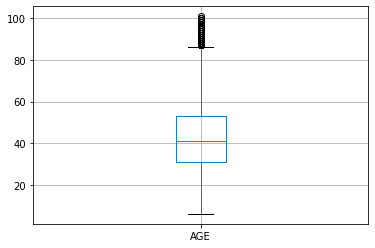

In [ ]:
train.boxplot(column='AGE')

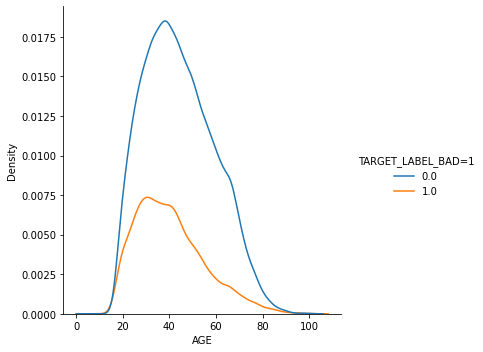

In [ ]:
sns.displot(data = train, x = 'AGE', kind = 'kde', hue = 'TARGET_LABEL_BAD=1')
plt.show()

<AxesSubplot:>

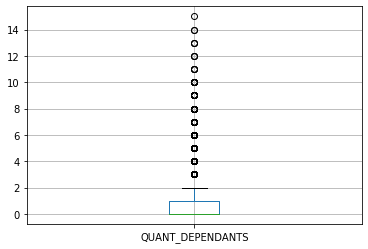

In [ ]:
train.boxplot(column='QUANT_DEPENDANTS')

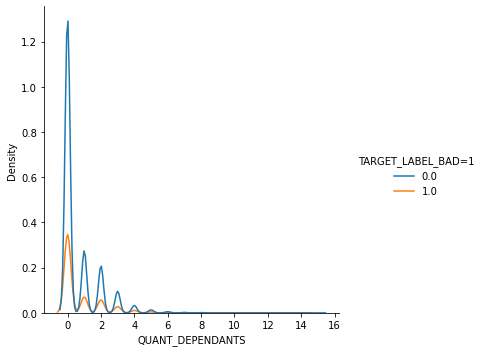

In [ ]:
sns.displot(data = train, x = 'QUANT_DEPENDANTS', kind = 'kde', hue = 'TARGET_LABEL_BAD=1')
plt.show()

<AxesSubplot:>

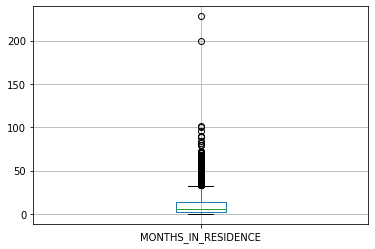

In [ ]:
train.boxplot(column='MONTHS_IN_RESIDENCE')

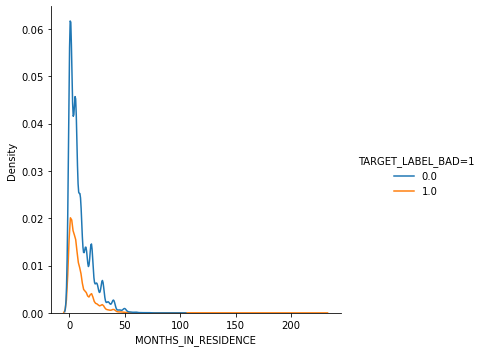

In [ ]:
sns.displot(data = train, x = 'MONTHS_IN_RESIDENCE', kind = 'kde', hue = 'TARGET_LABEL_BAD=1')
plt.show()

<AxesSubplot:>

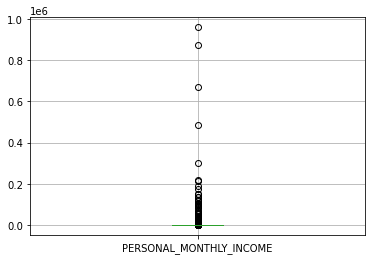

In [ ]:
train.boxplot(column='PERSONAL_MONTHLY_INCOME')

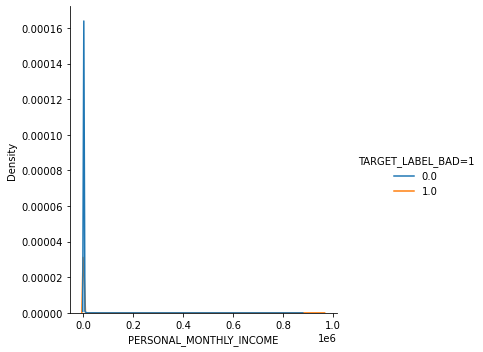

In [ ]:
sns.displot(data = train, x = 'PERSONAL_MONTHLY_INCOME', kind = 'kde', hue = 'TARGET_LABEL_BAD=1')
plt.show()

<AxesSubplot:>

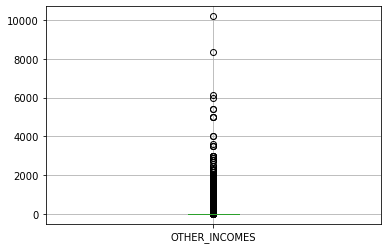

In [ ]:
train.boxplot(column='OTHER_INCOMES')

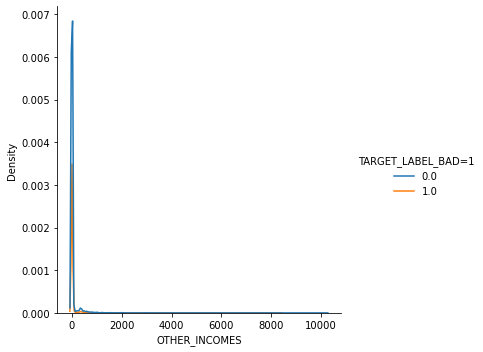

In [ ]:
sns.displot(data = train, x = 'OTHER_INCOMES', kind = 'kde', hue = 'TARGET_LABEL_BAD=1')
plt.show()

<AxesSubplot:>

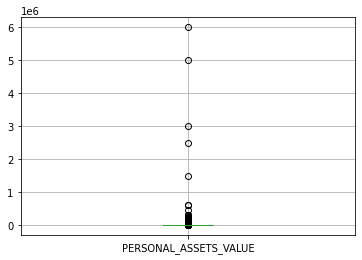

In [ ]:
train.boxplot(column='PERSONAL_ASSETS_VALUE')

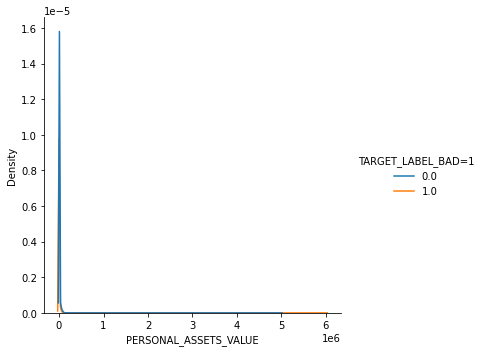

In [ ]:
sns.displot(data = train, x = 'PERSONAL_ASSETS_VALUE', kind = 'kde', hue = 'TARGET_LABEL_BAD=1')
plt.show()

<AxesSubplot:>

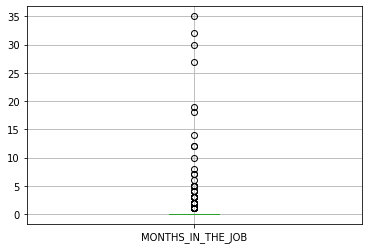

In [ ]:
train.boxplot(column='MONTHS_IN_THE_JOB')

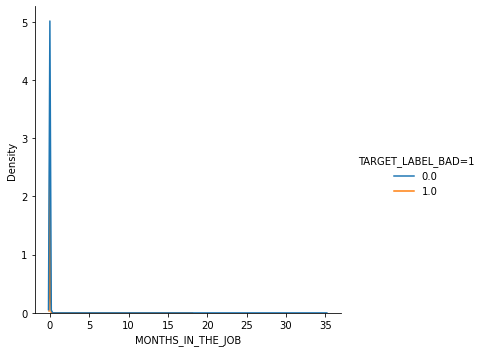

In [ ]:
sns.displot(data = train, x = 'MONTHS_IN_THE_JOB', kind = 'kde', hue = 'TARGET_LABEL_BAD=1')
plt.show()

In [ ]:
df1=train

In [ ]:
#Age looks actually not that bad, we will just leave it there as how it was

In [ ]:
#QUANT_DEPENDANTS, cut is at 6
df1 = df1.loc[df1['QUANT_DEPENDANTS'] < 7]

In [ ]:
#MONTHS_IN_RESIDENCE, 50 is a reasonable cut
df1 = df1.loc[df1['MONTHS_IN_RESIDENCE'] < 51]

In [ ]:
#Personal income is a disaster, try 40000 at first
df1 = df1.loc[df1['PERSONAL_MONTHLY_INCOME'] < 20000]

In [ ]:
#OTHER_INCOMES is a disaster too, try 800 at first
df1 = df1.loc[df1['OTHER_INCOMES'] < 800]

In [ ]:
#PERSONAL_ASSETS_VALUE... Try 40000
df1 = df1.loc[df1['PERSONAL_ASSETS_VALUE'] < 40000]

In [ ]:
#MONTHS_IN_THE_JOB, drop, too many 0s
df1=df1.drop(columns='MONTHS_IN_THE_JOB')

In [ ]:
df1.describe()

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1
count,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000,33739.000000
mean,12.884555,1.006610,0.620854,0.632947,0.956163,0.837399,9.123685,0.805537,712.456575,15.811122,0.106672,0.093512,0.001245,0.001482,0.001986,0.356324,0.356324,612.939625,0.332434,0.438335,0.268502,1.170930,42.987018,0.262130
std,6.619158,0.081031,0.485182,1.097916,0.204734,0.369007,9.706580,0.395793,717.893486,82.584115,0.308700,0.291153,0.035261,0.038468,0.044519,0.479476,0.479476,3882.065075,0.471093,0.496190,0.443187,0.438569,14.913321,0.439799
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31.000000,0.000000
50%,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,0.000000
75%,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,53.000000,1.000000
max,25.000000,2.000000,1.000000,6.000000,1.000000,1.000000,50.000000,1.000000,17510.000000,798.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,38000.000000,1.000000,1.000000,1.000000,3.000000,101.000000,1.000000


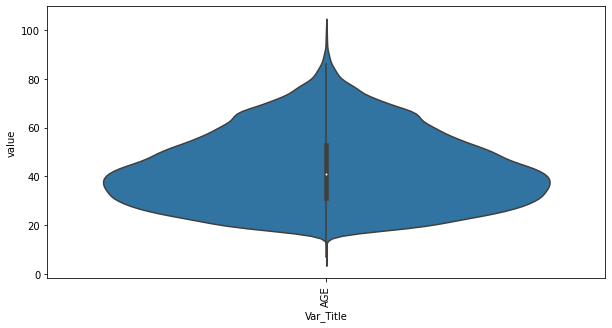

In [ ]:
#AGE Violin
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='Var_Title', y='value',data=pd.melt(df1.loc[:,['AGE']]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

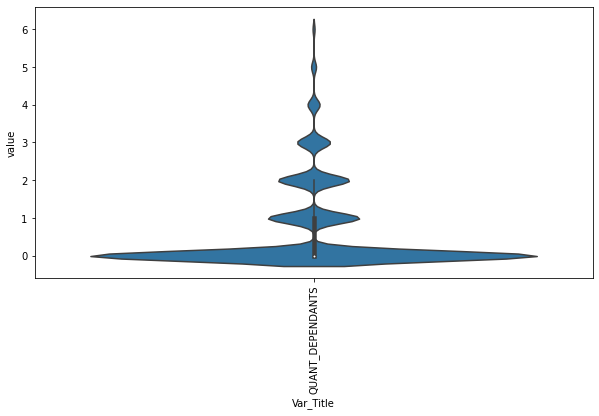

In [ ]:
#QUANT_DEPENDANTS
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='Var_Title', y='value',data=pd.melt(df1.loc[:,['QUANT_DEPENDANTS']]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

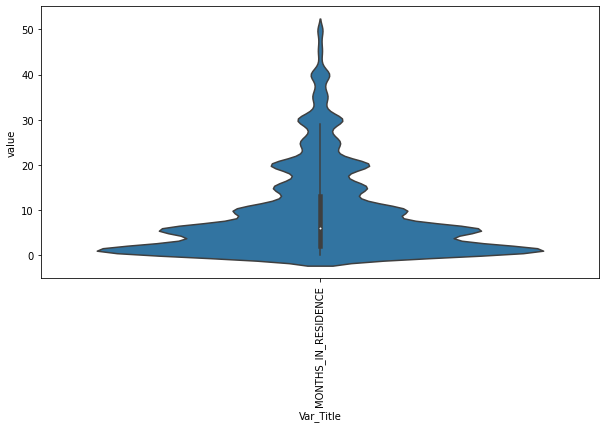

In [ ]:
#MONTHS_IN_RESIDENCE
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='Var_Title', y='value',data=pd.melt(df1.loc[:,['MONTHS_IN_RESIDENCE']]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

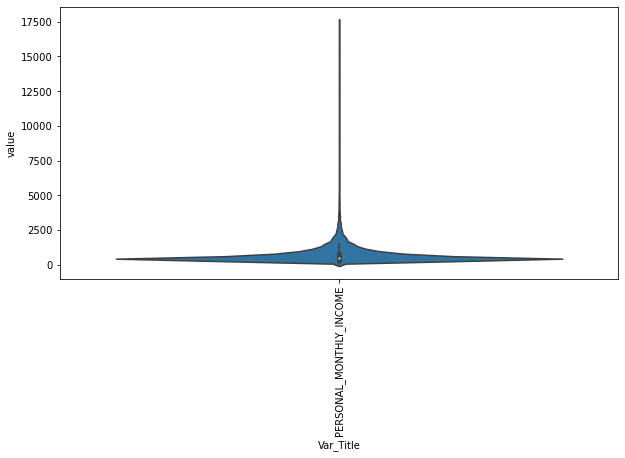

In [ ]:
#Personal Monthly income violin
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='Var_Title', y='value',data=pd.melt(df1.loc[:,['PERSONAL_MONTHLY_INCOME']]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

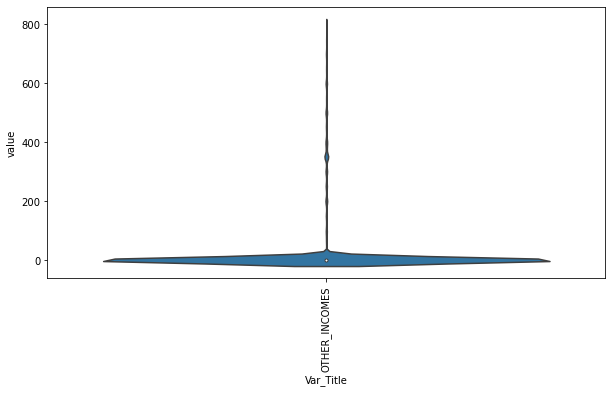

In [ ]:
#Other income violin
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='Var_Title', y='value',data=pd.melt(df1.loc[:,['OTHER_INCOMES']]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

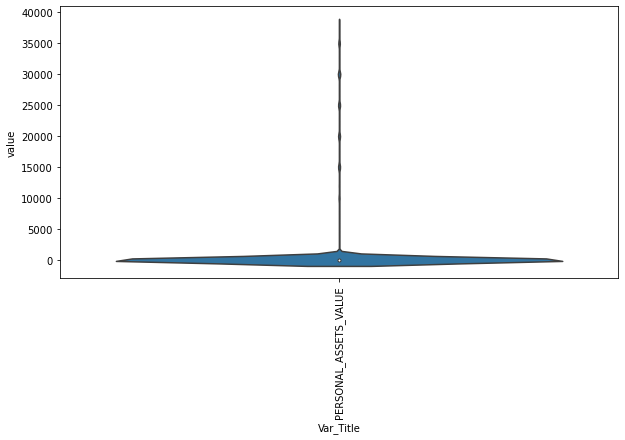

In [ ]:
#PERSONAL_ASSETS_VALUE
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='Var_Title', y='value',data=pd.melt(df1.loc[:,['PERSONAL_ASSETS_VALUE']]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

We noticed that the data is still not good enough with the outliers, here we start with the personal monthly income again, cause we believe thats the most important factor to bring the data back to normal. 

In [ ]:
#15000 is the proper cut I think, from the violin plot, for PERSONAL MONTHLY INCOME, we cannot cut too many
df1 = df1.loc[df1['PERSONAL_MONTHLY_INCOME'] < 15000]

In [ ]:
#We need to modify OTHER_INCOMES as well
df1 = df1.loc[df1['OTHER_INCOMES'] < 600]

In [ ]:
#PERSONAL_ASSETS_VALUE: Leave it there, the data is strange, we will figure out if we should delete this in later steps

In [ ]:
df1.describe()

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1
count,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000
mean,12.883480,1.006623,0.620607,0.631824,0.955910,0.837032,9.108138,0.806097,709.721933,11.760512,0.105751,0.092864,0.001253,0.001492,0.001999,0.355587,0.355587,607.105483,0.331543,0.438220,0.268242,1.170843,42.986099,0.261977
std,6.616225,0.081110,0.485243,1.096871,0.205299,0.369342,9.704732,0.395359,689.427599,64.932670,0.307524,0.290247,0.035375,0.038592,0.044663,0.479259,0.479259,3860.848213,0.470775,0.496176,0.443051,0.438333,14.917561,0.439717
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31.000000,0.000000
50%,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,0.000000
75%,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,53.000000,1.000000
max,25.000000,2.000000,1.000000,6.000000,1.000000,1.000000,50.000000,1.000000,13757.000000,599.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,38000.000000,1.000000,1.000000,1.000000,3.000000,101.000000,1.000000


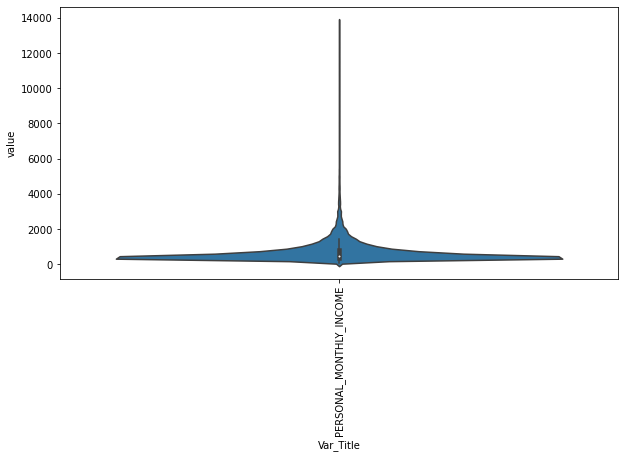

In [ ]:
#PERSONAL_MONTHLY_INCOME violin
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='Var_Title', y='value',data=pd.melt(df1.loc[:,['PERSONAL_MONTHLY_INCOME']]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

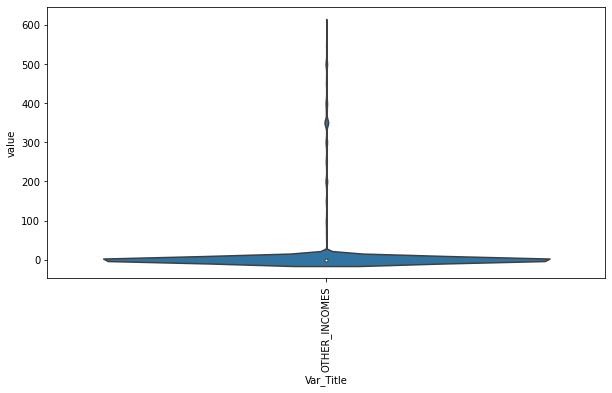

In [ ]:
#OTHER_INCOMES violin
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='Var_Title', y='value',data=pd.melt(df1.loc[:,['OTHER_INCOMES']]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

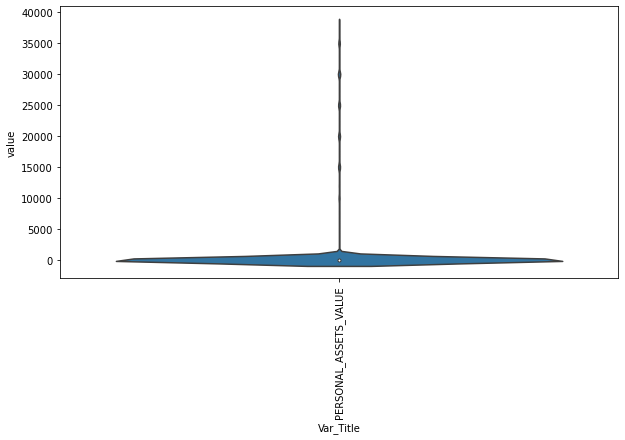

In [ ]:
#PERSONAL_ASSETS_VALUE
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='Var_Title', y='value',data=pd.melt(df1.loc[:,['PERSONAL_ASSETS_VALUE']]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

Still does not look too good, but thats the best we can do for here, if we cut too much for the outliers, our sample amount will be drastcally decreased.

In [ ]:
cleantrain=df1
#record the clean train set
cleantrain.describe()

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1
count,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000
mean,12.883480,1.006623,0.620607,0.631824,0.955910,0.837032,9.108138,0.806097,709.721933,11.760512,0.105751,0.092864,0.001253,0.001492,0.001999,0.355587,0.355587,607.105483,0.331543,0.438220,0.268242,1.170843,42.986099,0.261977
std,6.616225,0.081110,0.485243,1.096871,0.205299,0.369342,9.704732,0.395359,689.427599,64.932670,0.307524,0.290247,0.035375,0.038592,0.044663,0.479259,0.479259,3860.848213,0.470775,0.496176,0.443051,0.438333,14.917561,0.439717
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31.000000,0.000000
50%,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,0.000000
75%,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,53.000000,1.000000
max,25.000000,2.000000,1.000000,6.000000,1.000000,1.000000,50.000000,1.000000,13757.000000,599.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,38000.000000,1.000000,1.000000,1.000000,3.000000,101.000000,1.000000


Now we implement three new variables that we think might be important to the data

In [ ]:
cleantrain['TOTAL_INCOME'] = cleantrain['PERSONAL_MONTHLY_INCOME'] + cleantrain['OTHER_INCOMES']
cleantrain['TOTAL_BANKING_ACCOUNTS'] = cleantrain['QUANT_BANKING_ACCOUNTS'] + cleantrain['QUANT_SPECIAL_BANKING_ACCOUNTS']
cleantrain['TOTAL_TYPE_OF_CARDS'] = cleantrain['FLAG_VISA'] + cleantrain['FLAG_MASTERCARD']+cleantrain['FLAG_DINERS']+cleantrain['FLAG_AMERICAN_EXPRESS']+cleantrain['FLAG_OTHER_CARDS']

In [ ]:
cleantrain.describe()

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1,TOTAL_INCOME,TOTAL_BANKING_ACCOUNTS,TOTAL_TYPE_OF_CARDS
count,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000
mean,12.883480,1.006623,0.620607,0.631824,0.955910,0.837032,9.108138,0.806097,709.721933,11.760512,0.105751,0.092864,0.001253,0.001492,0.001999,0.355587,0.355587,607.105483,0.331543,0.438220,0.268242,1.170843,42.986099,0.261977,721.482444,0.711175,0.203359
std,6.616225,0.081110,0.485243,1.096871,0.205299,0.369342,9.704732,0.395359,689.427599,64.932670,0.307524,0.290247,0.035375,0.038592,0.044663,0.479259,0.479259,3860.848213,0.470775,0.496176,0.443051,0.438333,14.917561,0.439717,689.720611,0.958517,0.510172
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,69.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31.000000,0.000000,368.000000,0.000000,0.000000
50%,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,0.000000,500.000000,0.000000,0.000000
75%,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,53.000000,1.000000,800.000000,2.000000,0.000000
max,25.000000,2.000000,1.000000,6.000000,1.000000,1.000000,50.000000,1.000000,13757.000000,599.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,38000.000000,1.000000,1.000000,1.000000,3.000000,101.000000,1.000000,13757.000000,4.000000,4.000000


### Outliers for Test set

We do not clean the outliers for test set, as sometimes the outliers are the real situation that we need to faced, it is part of the future. If we truly want to see how our model can perform the prediction, we need to keep the outliers in the test set

In [ ]:
df2=test
df2.isnull().any()

Var_Title
PAYMENT_DAY                       False
POSTAL_ADDRESS_TYPE               False
SEX                               False
MARITAL_STATUS                    False
QUANT_DEPENDANTS                  False
STATE_OF_BIRTH                    False
NACIONALITY                       False
RESIDENCIAL_STATE                 False
RESIDENCIAL_CITY                  False
RESIDENCIAL_BOROUGH               False
FLAG_RESIDENCIAL_PHONE            False
RESIDENCE_TYPE                    False
MONTHS_IN_RESIDENCE               False
FLAG_EMAIL                        False
PERSONAL_MONTHLY_INCOME           False
OTHER_INCOMES                     False
FLAG_VISA                         False
FLAG_MASTERCARD                   False
FLAG_DINERS                       False
FLAG_AMERICAN_EXPRESS             False
FLAG_OTHER_CARDS                  False
QUANT_BANKING_ACCOUNTS            False
QUANT_SPECIAL_BANKING_ACCOUNTS    False
PERSONAL_ASSETS_VALUE             False
QUANT_CARS                    

In [ ]:
df2=df2.drop(columns='MONTHS_IN_THE_JOB')

In [ ]:
cleantest=df2
cleantest['TOTAL_INCOME'] = cleantest['PERSONAL_MONTHLY_INCOME'] + cleantest['OTHER_INCOMES']
cleantest['TOTAL_BANKING_ACCOUNTS'] = cleantest['QUANT_BANKING_ACCOUNTS'] + cleantest['QUANT_SPECIAL_BANKING_ACCOUNTS']
cleantest['TOTAL_TYPE_OF_CARDS'] = cleantest['FLAG_VISA'] + cleantest['FLAG_MASTERCARD']+cleantest['FLAG_DINERS']+cleantest['FLAG_AMERICAN_EXPRESS']+cleantest['FLAG_OTHER_CARDS']

In [ ]:
cleantest.describe(include='all')

Var_Title,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,TOTAL_INCOME,TOTAL_BANKING_ACCOUNTS,TOTAL_TYPE_OF_CARDS
count,15000.000000,15000.000000,15000.000000,15000,15000.000000,15000,15000.000000,15000,15000,15000,15000.000000,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000.000000,15000.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,3,4,6,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,3,NaN,2,NaN,2,2,3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,9220,NaN,7713,NaN,9566,11725,9801,NaN,13118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6069,NaN,NaN,NaN,NaN
mean,12.889600,1.005933,0.612133,NaN,0.634267,NaN,0.958133,NaN,NaN,NaN,0.837667,NaN,9.457333,0.798800,799.874569,44.416593,0.111533,0.099333,0.001000,0.002133,0.002200,0.358000,0.358000,2.137884e+03,0.337533,0.442267,0.268533,1.169867,43.407867,NaN,0.260800,844.291162,0.716000,0.216200
std,6.597276,0.076802,0.487280,NaN,1.231777,NaN,0.200291,NaN,NaN,NaN,0.368769,NaN,10.242036,0.400911,3412.383497,1599.998798,0.314802,0.299119,0.031608,0.046140,0.046854,0.480123,0.480123,2.027787e+04,0.472884,0.496672,0.443211,0.438587,15.071138,NaN,0.439086,3768.966713,0.960246,0.523331
min,1.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,17.000000,NaN,0.000000,60.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,32.000000,NaN,0.000000,372.000000,0.000000,0.000000
50%,10.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,42.000000,NaN,0.000000,510.000000,0.000000,0.000000
75%,15.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,14.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,54.000000,NaN,1.000000,826.240000,2.000000,0.000000


In [ ]:
#saving the result
cleantrain.to_csv("train_clean.csv", index = False)
cleantest.to_csv("test_clean.csv", index = False)

### Weight of Evidence

In [ ]:
bins = sc.woebin(cleantrain, y = 'TARGET_LABEL_BAD=1', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02, # Minimum information value 
                 max_num_bin=10, # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 33522 rows and 34 columns in 00:00:13


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\zhyim\anaconda3\lib\site-packages\scorecardpy\woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


{'MONTHS_IN_RESIDENCE': <Figure size 432x288 with 2 Axes>,
 'SEX': <Figure size 432x288 with 2 Axes>,
 'FLAG_RESIDENCIAL_PHONE': <Figure size 432x288 with 2 Axes>,
 'PERSONAL_ASSETS_VALUE': <Figure size 432x288 with 2 Axes>,
 'AGE': <Figure size 432x288 with 2 Axes>,
 'FLAG_DINERS': <Figure size 432x288 with 2 Axes>,
 'COMPANY': <Figure size 432x288 with 2 Axes>,
 'PRODUCT': <Figure size 432x288 with 2 Axes>,
 'QUANT_SPECIAL_BANKING_ACCOUNTS': <Figure size 432x288 with 2 Axes>,
 'QUANT_DEPENDANTS': <Figure size 432x288 with 2 Axes>,
 'QUANT_BANKING_ACCOUNTS': <Figure size 432x288 with 2 Axes>,
 'RESIDENCE_TYPE': <Figure size 432x288 with 2 Axes>,
 'FLAG_PROFESSIONAL_PHONE': <Figure size 432x288 with 2 Axes>,
 'RESIDENCIAL_CITY': <Figure size 432x288 with 2 Axes>,
 'TOTAL_TYPE_OF_CARDS': <Figure size 432x288 with 2 Axes>,
 'NACIONALITY': <Figure size 432x288 with 2 Axes>,
 'FLAG_VISA': <Figure size 432x288 with 2 Axes>,
 'FLAG_OTHER_CARDS': <Figure size 432x288 with 2 Axes>,
 'RESIDENCI

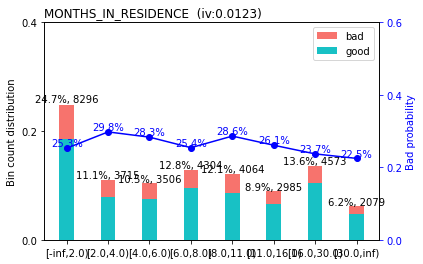

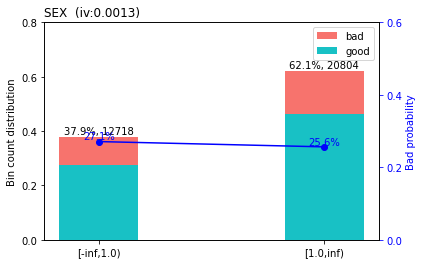

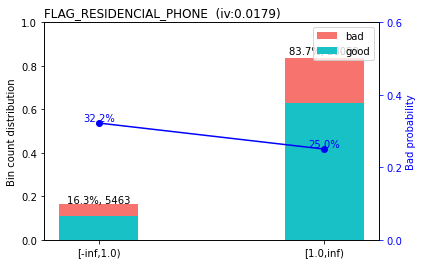

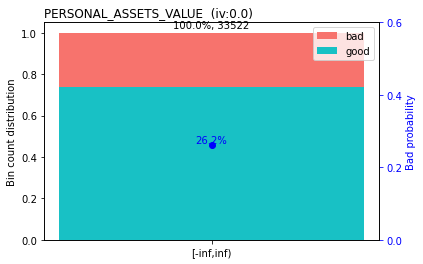

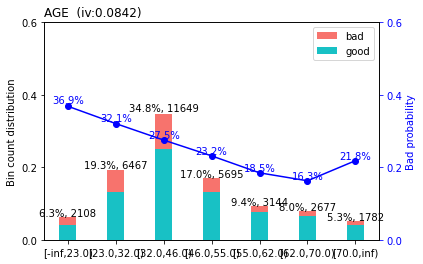

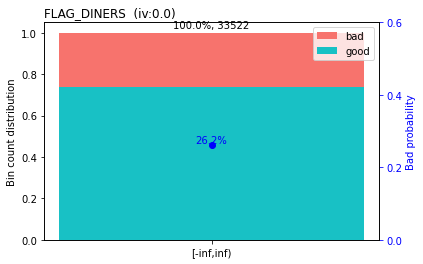

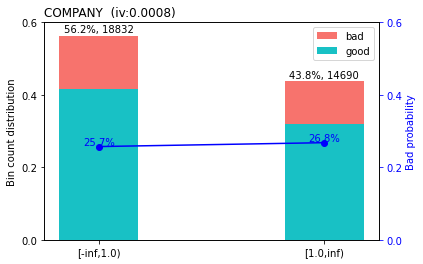

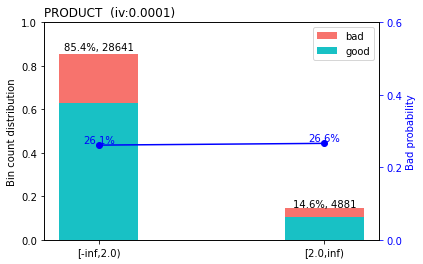

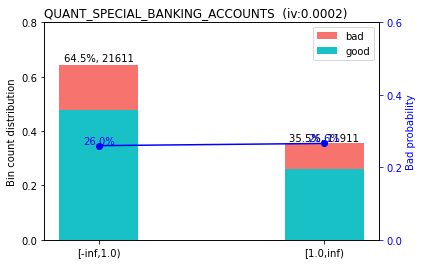

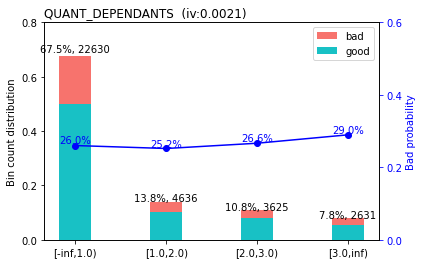

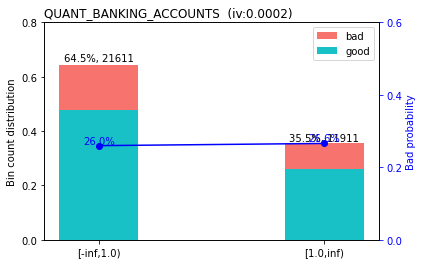

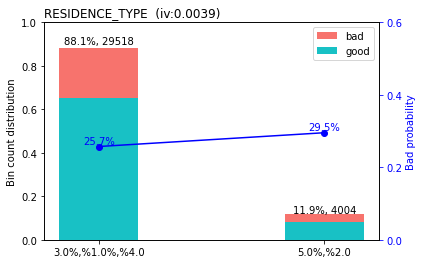

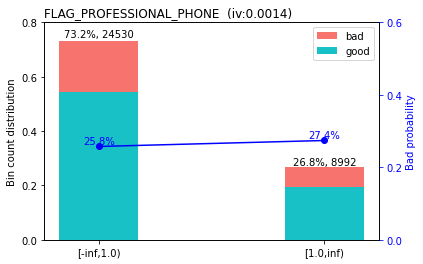

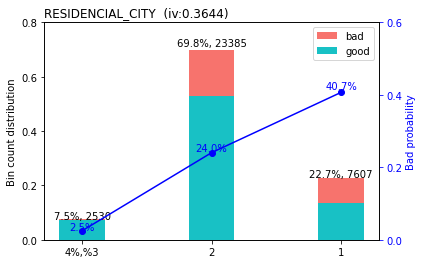

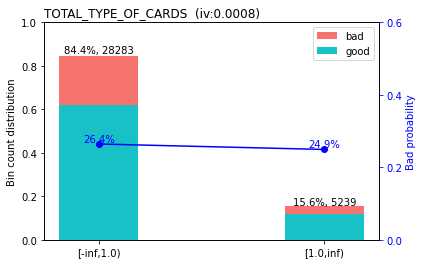

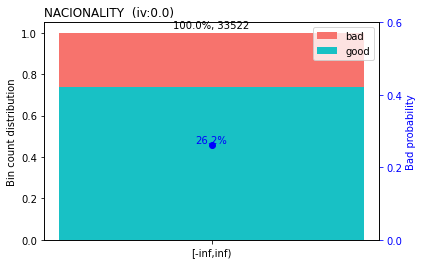

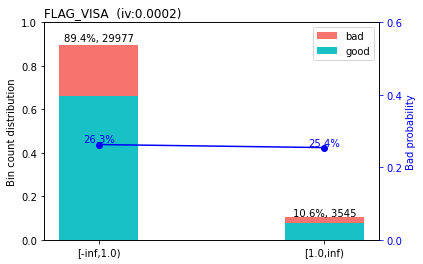

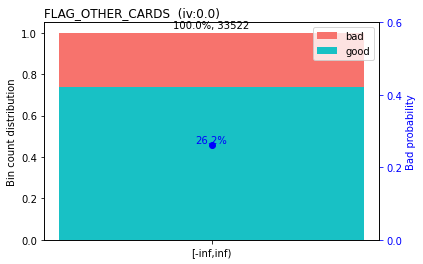

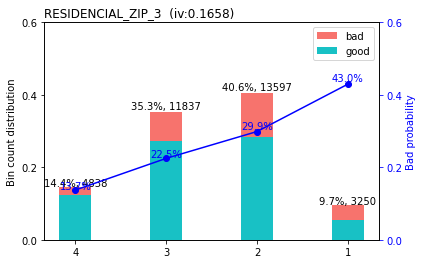

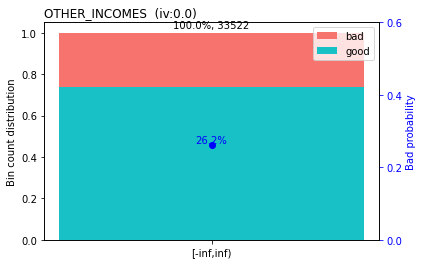

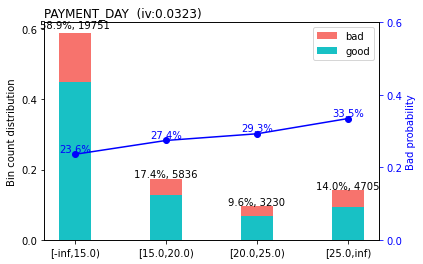

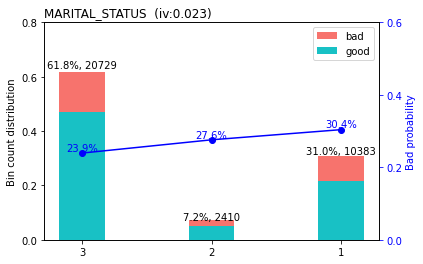

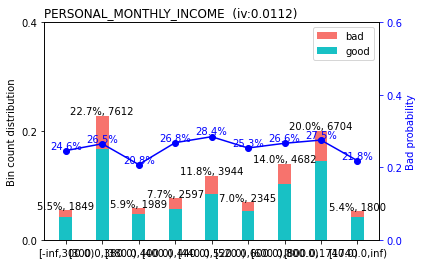

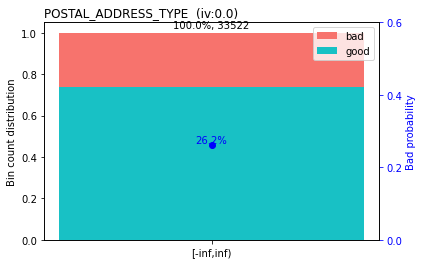

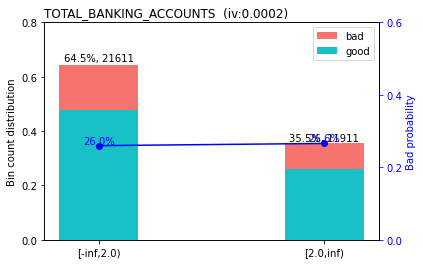

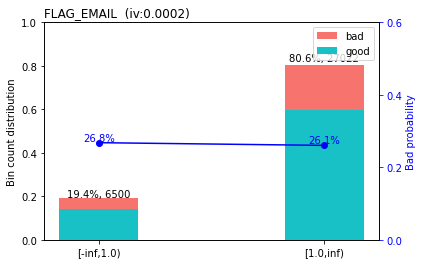

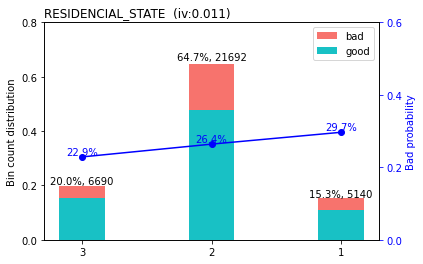

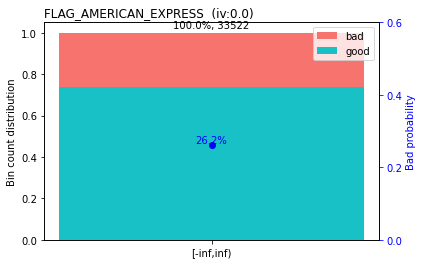

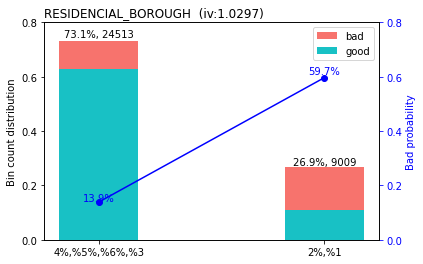

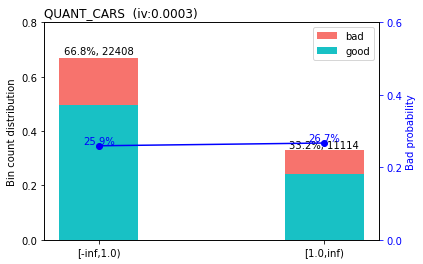

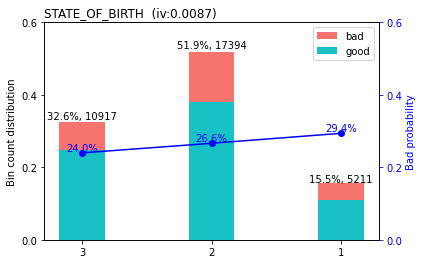

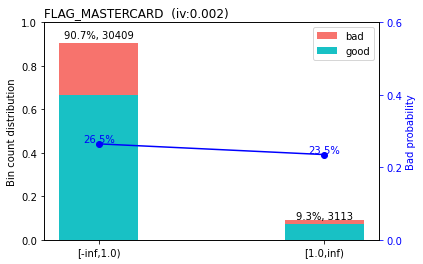

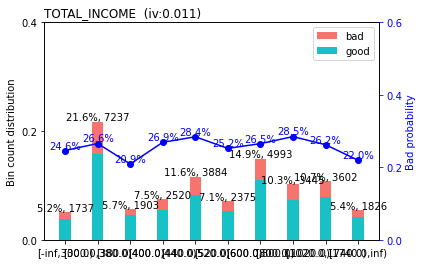

In [ ]:
sc.woebin_plot(bins)

-------- 1/13 AGE --------
>>> dt[AGE].describe(): 
count    33522.000000
mean        42.986099
std         14.917561
min          7.000000
25%         31.000000
50%         41.000000
75%         53.000000
max        101.000000
Name: AGE, dtype: float64 



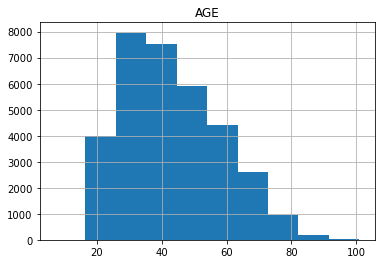

>>> Current breaks:
23.0,32.0,46.0,55.0,62.0,70.0 



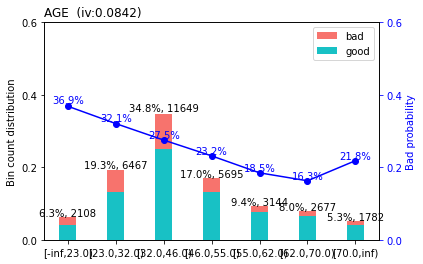

>>> Adjust breaks for (1/13) AGE?
1: next 
2: yes 
3: back


Selection:  2
>>> Enter modified breaks:  32,46,55,62


[INFO] creating woe binning ...
>>> Current breaks:
62.0, 55.0, 32.0, 46.0 



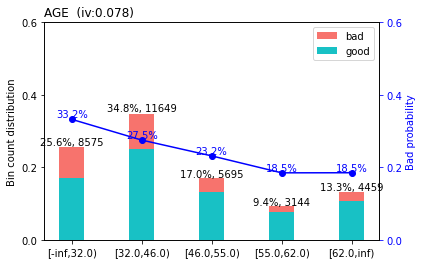

>>> Adjust breaks for (1/13) AGE?
1: next 
2: yes 
3: back


Selection:  1


-------- 2/13 FLAG_EMAIL --------
>>> dt[FLAG_EMAIL].describe(): 
count    33522.000000
mean         0.806097
std          0.395359
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: FLAG_EMAIL, dtype: float64 

>>> dt[FLAG_EMAIL].value_counts(): 
1.0    27022
0.0     6500
Name: FLAG_EMAIL, dtype: int64 

>>> Current breaks:
1.0 



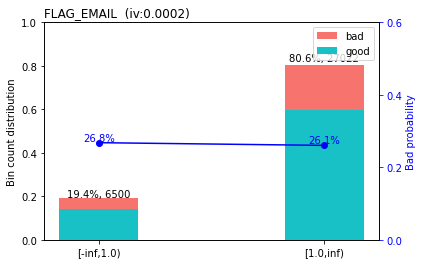

>>> Adjust breaks for (2/13) FLAG_EMAIL?
1: next 
2: yes 
3: back


Selection:  1


-------- 3/13 FLAG_VISA --------
>>> dt[FLAG_VISA].describe(): 
count    33522.000000
mean         0.105751
std          0.307524
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FLAG_VISA, dtype: float64 

>>> dt[FLAG_VISA].value_counts(): 
0.0    29977
1.0     3545
Name: FLAG_VISA, dtype: int64 

>>> Current breaks:
1.0 



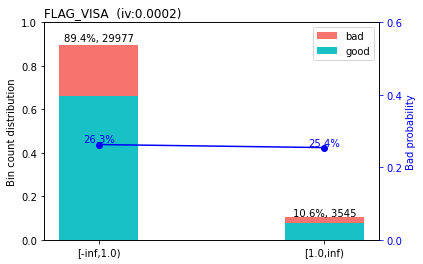

>>> Adjust breaks for (3/13) FLAG_VISA?
1: next 
2: yes 
3: back


Selection:  1


-------- 4/13 MARITAL_STATUS --------
>>> dt[MARITAL_STATUS].describe(): 
count     33522
unique        3
top           3
freq      20729
Name: MARITAL_STATUS, dtype: object 

>>> dt[MARITAL_STATUS].value_counts(): 
3    20729
1    10383
2     2410
Name: MARITAL_STATUS, dtype: int64 

>>> Current breaks:
'3','2','1' 



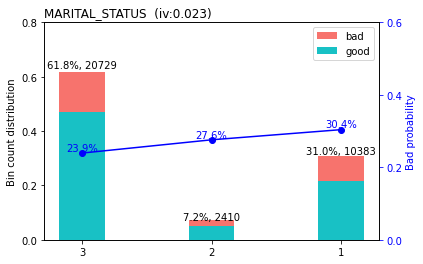

>>> Adjust breaks for (4/13) MARITAL_STATUS?
1: next 
2: yes 
3: back


Selection:  1


-------- 5/13 MONTHS_IN_RESIDENCE --------
>>> dt[MONTHS_IN_RESIDENCE].describe(): 
count    33522.000000
mean         9.108138
std          9.704732
min          0.000000
25%          2.000000
50%          6.000000
75%         13.000000
max         50.000000
Name: MONTHS_IN_RESIDENCE, dtype: float64 



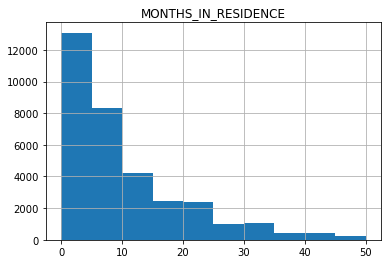

>>> Current breaks:
2.0,4.0,6.0,8.0,11.0,16.0,30.0 



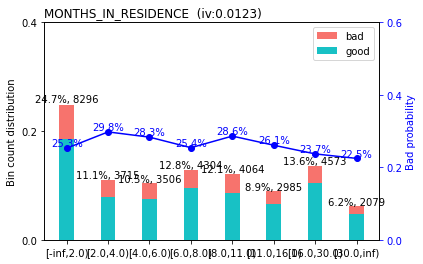

>>> Adjust breaks for (5/13) MONTHS_IN_RESIDENCE?
1: next 
2: yes 
3: back


Selection:  2
>>> Enter modified breaks:  6,11,16,27


[INFO] creating woe binning ...
>>> Current breaks:
11.0, 16.0, 27.0, 6.0 



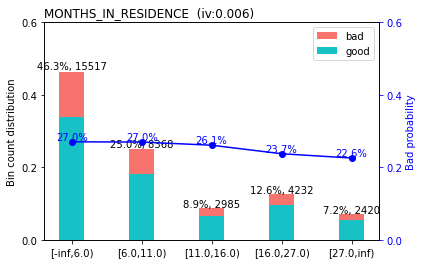

>>> Adjust breaks for (5/13) MONTHS_IN_RESIDENCE?
1: next 
2: yes 
3: back


Selection:  1


-------- 6/13 PAYMENT_DAY --------
>>> dt[PAYMENT_DAY].describe(): 
count    33522.000000
mean        12.883480
std          6.616225
min          1.000000
25%         10.000000
50%         10.000000
75%         15.000000
max         25.000000
Name: PAYMENT_DAY, dtype: float64 

>>> dt[PAYMENT_DAY].value_counts(): 
10    13596
15     5836
5      5000
25     4705
20     3230
1      1155
Name: PAYMENT_DAY, dtype: int64 

>>> Current breaks:
15.0,20.0,25.0 



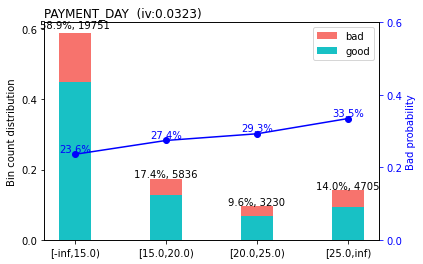

>>> Adjust breaks for (6/13) PAYMENT_DAY?
1: next 
2: yes 
3: back


Selection:  1


-------- 7/13 PERSONAL_MONTHLY_INCOME --------
>>> dt[PERSONAL_MONTHLY_INCOME].describe(): 
count    33522.000000
mean       709.721933
std        689.427599
min         69.000000
25%        358.000000
50%        500.000000
75%        800.000000
max      13757.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64 



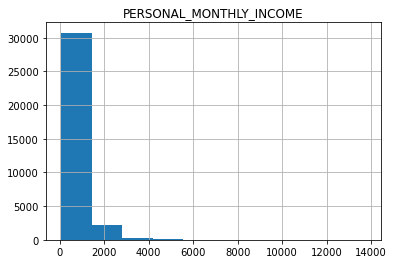

>>> Current breaks:
300.0,380.0,400.0,440.0,520.0,600.0,800.0,1740.0 



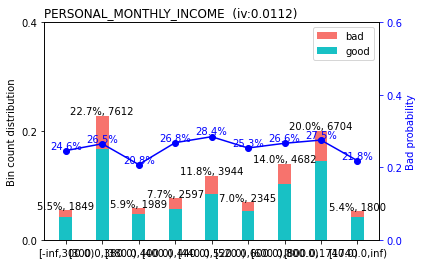

>>> Adjust breaks for (7/13) PERSONAL_MONTHLY_INCOME?
1: next 
2: yes 
3: back


Selection:  2
>>> Enter modified breaks:  380,520,660,1740


[INFO] creating woe binning ...
>>> Current breaks:
520.0, 660.0, 380.0, 1740.0 



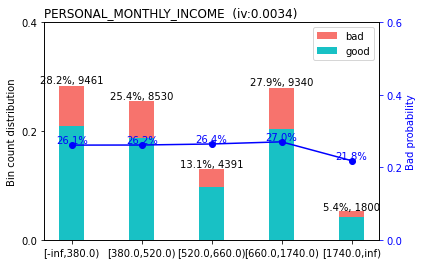

>>> Adjust breaks for (7/13) PERSONAL_MONTHLY_INCOME?
1: next 
2: yes 
3: back


Selection:  1


-------- 8/13 PRODUCT --------
>>> dt[PRODUCT].describe(): 
count    33522.000000
mean         1.170843
std          0.438333
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: PRODUCT, dtype: float64 

>>> dt[PRODUCT].value_counts(): 
1.0    28641
2.0     4035
3.0      846
Name: PRODUCT, dtype: int64 

>>> Current breaks:
2.0 



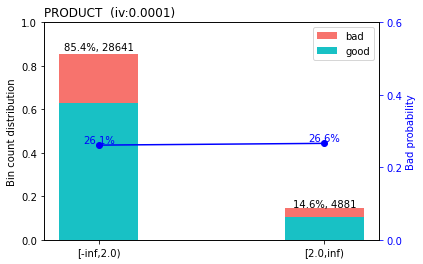

>>> Adjust breaks for (8/13) PRODUCT?
1: next 
2: yes 
3: back


Selection:  1


-------- 9/13 QUANT_BANKING_ACCOUNTS --------
>>> dt[QUANT_BANKING_ACCOUNTS].describe(): 
count    33522.000000
mean         0.355587
std          0.479259
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: QUANT_BANKING_ACCOUNTS, dtype: float64 

>>> dt[QUANT_BANKING_ACCOUNTS].value_counts(): 
0.0    21611
1.0    11902
2.0        9
Name: QUANT_BANKING_ACCOUNTS, dtype: int64 

>>> Current breaks:
1.0 



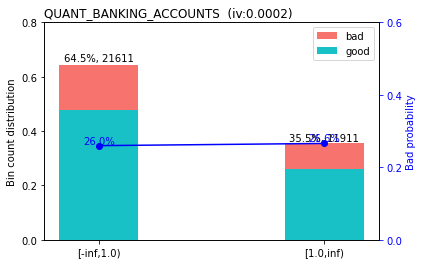

>>> Adjust breaks for (9/13) QUANT_BANKING_ACCOUNTS?
1: next 
2: yes 
3: back


Selection:  1


-------- 10/13 QUANT_DEPENDANTS --------
>>> dt[QUANT_DEPENDANTS].describe(): 
count    33522.000000
mean         0.631824
std          1.096871
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: QUANT_DEPENDANTS, dtype: float64 

>>> dt[QUANT_DEPENDANTS].value_counts(): 
0    22630
1     4636
2     3625
3     1675
4      611
5      245
6      100
Name: QUANT_DEPENDANTS, dtype: int64 

>>> Current breaks:
1.0,2.0,3.0 



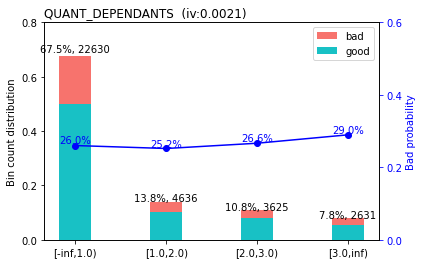

>>> Adjust breaks for (10/13) QUANT_DEPENDANTS?
1: next 
2: yes 
3: back


Selection:  1


-------- 11/13 RESIDENCIAL_ZIP_3 --------
>>> dt[RESIDENCIAL_ZIP_3].describe(): 
count     33522
unique        4
top           2
freq      13597
Name: RESIDENCIAL_ZIP_3, dtype: object 

>>> dt[RESIDENCIAL_ZIP_3].value_counts(): 
2    13597
3    11837
4     4838
1     3250
Name: RESIDENCIAL_ZIP_3, dtype: int64 

>>> Current breaks:
'4','3','2','1' 



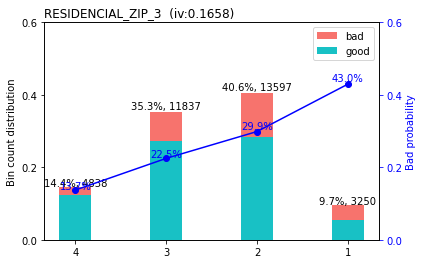

>>> Adjust breaks for (11/13) RESIDENCIAL_ZIP_3?
1: next 
2: yes 
3: back


Selection:  1


-------- 12/13 STATE_OF_BIRTH --------
>>> dt[STATE_OF_BIRTH].describe(): 
count     33522
unique        3
top           2
freq      17394
Name: STATE_OF_BIRTH, dtype: object 

>>> dt[STATE_OF_BIRTH].value_counts(): 
2    17394
3    10917
1     5211
Name: STATE_OF_BIRTH, dtype: int64 

>>> Current breaks:
'3','2','1' 



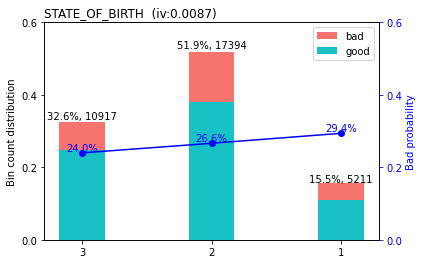

>>> Adjust breaks for (12/13) STATE_OF_BIRTH?
1: next 
2: yes 
3: back


Selection:  1


-------- 13/13 TOTAL_INCOME --------
>>> dt[TOTAL_INCOME].describe(): 
count    33522.000000
mean       721.482444
std        689.720611
min         69.000000
25%        368.000000
50%        500.000000
75%        800.000000
max      13757.000000
Name: TOTAL_INCOME, dtype: float64 



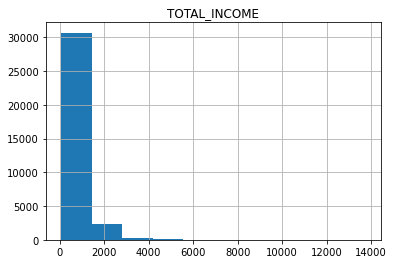

>>> Current breaks:
300.0,380.0,400.0,440.0,520.0,600.0,800.0,1020.0,1740.0 



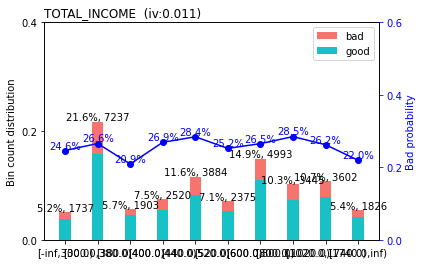

>>> Adjust breaks for (13/13) TOTAL_INCOME?
1: next 
2: yes 
3: back


Selection:  2
>>> Enter modified breaks:  380,520,660,1740


[INFO] creating woe binning ...
>>> Current breaks:
520.0, 660.0, 380.0, 1740.0 



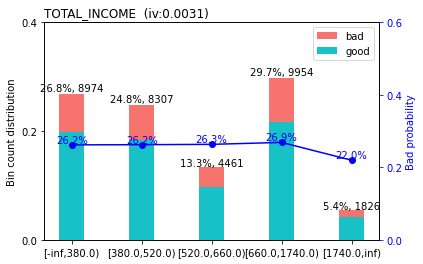

>>> Adjust breaks for (13/13) TOTAL_INCOME?
1: next 
2: yes 
3: back


Selection:  1


In [ ]:
breaks_adj = sc.woebin_adj(cleantrain, "TARGET_LABEL_BAD=1", bins, adj_all_var = False)

In [ ]:
bins_adj = sc.woebin(cleantrain, y="TARGET_LABEL_BAD=1", breaks_list=breaks_adj) # Apply new cuts
train_woe = sc.woebin_ply(cleantrain, bins_adj) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(cleantest, bins_adj) # Calculate WoE dataset (test)

[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [ ]:
train_woe.to_csv("train_woe.csv", index = False)
test_woe.to_csv("test_woe.csv", index = False)

### Information value filter

In [ ]:
sc.iv(train_woe, 'TARGET_LABEL_BAD=1')

,variable,info_value
7,RESIDENCIAL_BOROUGH_woe,1.029684
29,RESIDENCIAL_CITY_woe,0.364442
3,RESIDENCIAL_ZIP_3_woe,0.165772
4,AGE_woe,0.078019
23,PAYMENT_DAY_woe,0.032268
6,MARITAL_STATUS_woe,0.023044
25,FLAG_RESIDENCIAL_PHONE_woe,0.017929
14,RESIDENCIAL_STATE_woe,0.011005
26,STATE_OF_BIRTH_woe,0.008732
1,MONTHS_IN_RESIDENCE_woe,0.006032


Clearly we observed that, most variables in this list have small information value, if we were just trying to be purist, only two variables will be kept for a strict 0.02 cutoff point. In this case, since we do not have any other stronger variables in this dataset, we set the cutoff point at 0.003 instead, that is, drop everything below that.

In [ ]:
train_woe = train_woe[['TARGET_LABEL_BAD=1','RESIDENCIAL_BOROUGH_woe','RESIDENCIAL_CITY_woe','RESIDENCIAL_ZIP_3_woe','AGE_woe',
                       'PAYMENT_DAY_woe','MARITAL_STATUS_woe','FLAG_RESIDENCIAL_PHONE_woe','MONTHS_IN_RESIDENCE_woe',
                       'RESIDENCIAL_STATE_woe','STATE_OF_BIRTH_woe','PERSONAL_MONTHLY_INCOME_woe']]
test_woe = test_woe[['TARGET_LABEL_BAD=1','RESIDENCIAL_BOROUGH_woe','RESIDENCIAL_CITY_woe','RESIDENCIAL_ZIP_3_woe','AGE_woe',
                       'PAYMENT_DAY_woe','MARITAL_STATUS_woe','FLAG_RESIDENCIAL_PHONE_woe','MONTHS_IN_RESIDENCE_woe',
                       'RESIDENCIAL_STATE_woe','STATE_OF_BIRTH_woe','PERSONAL_MONTHLY_INCOME_woe']]
#No total income, correlations

train_woe = train_woe[['TARGET_LABEL_BAD=1','RESIDENCIAL_CITY_woe','AGE_woe','PAYMENT_DAY_woe','MARITAL_STATUS_woe']]
test_woe = test_woe[['TARGET_LABEL_BAD=1','RESIDENCIAL_CITY_woe','AGE_woe','PAYMENT_DAY_woe','MARITAL_STATUS_woe']]

In [ ]:
sc.iv(train_woe, 'TARGET_LABEL_BAD=1')

,variable,info_value
2,RESIDENCIAL_BOROUGH_woe,1.029684
7,RESIDENCIAL_CITY_woe,0.364442
5,RESIDENCIAL_ZIP_3_woe,0.165772
6,AGE_woe,0.078019
10,PAYMENT_DAY_woe,0.032268
8,MARITAL_STATUS_woe,0.023044
9,FLAG_RESIDENCIAL_PHONE_woe,0.017929
1,RESIDENCIAL_STATE_woe,0.011005
4,STATE_OF_BIRTH_woe,0.008732
0,MONTHS_IN_RESIDENCE_woe,0.006032


In [ ]:
train_woe.to_csv("train1woe.csv", index = False)
test_woe.to_csv("test1woe.csv", index = False)

### Correlation Analysis

<AxesSubplot:>

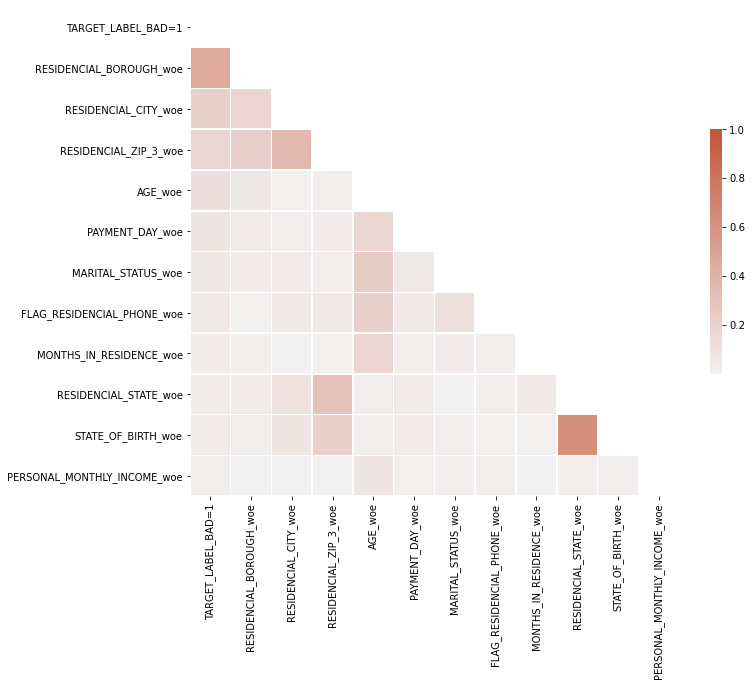

In [ ]:
corr = np.abs(train_woe.corr())
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#train_woe=train_woe.drop(columns=['RESIDENCIAL_STATE_woe'])
#test_woe=test_woe.drop(columns=['RESIDENCIAL_STATE_woe'])

### Question3: 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
logreg = LogisticRegressionCV(penalty='elasticnet', # Type of penalization l1 = lasso, l2 = ridge, elasticnet
                                     Cs = 13,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.00001, # Tolerance for parameters
                                     cv = 5,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant? 
                                     class_weight='balanced',# Weights, see below
                                     random_state=251238783, # Random seed
                                     max_iter=150, # Maximum iterations
                                     verbose=0, # Show process. 1 is yes.
                                     solver = 'saga', # How to optimize.
                                     n_jobs = 8,      # Processes to use. Set to number of physical cores. 
                                     refit = True,     # If to retrain with the best parameter and all data after finishing.
                                     l1_ratios = np.arange(0, 1.001, 0.01) # The LASSO / Ridge ratios.
                                    )

In [ ]:
logreg.fit(X = train_woe.iloc[:,1:], # All rows and from the second var to end
           y = train_woe['TARGET_LABEL_BAD=1'] # The target
          )

LogisticRegressionCV(Cs=13, class_weight='balanced', cv=5,
                     l1_ratios=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]),
                     max_iter=150, n_jobs=8, penalty='elasticnet',
                     random_state=251238783, solver='saga', tol=1e-05)

In [ ]:
coef_df = pd.concat([pd.DataFrame({'column': train_woe.columns[1:]}), 
                    pd.DataFrame(np.transpose(logreg.coef_))],
                    axis = 1
                   )
coef_df

,column,0
0,RESIDENCIAL_BOROUGH_woe,0.871406
1,RESIDENCIAL_CITY_woe,0.573707
2,RESIDENCIAL_ZIP_3_woe,0.159891
3,AGE_woe,0.412604
4,PAYMENT_DAY_woe,0.134145
5,MARITAL_STATUS_woe,0.024869
6,FLAG_RESIDENCIAL_PHONE_woe,0.235135
7,MONTHS_IN_RESIDENCE_woe,0.000000
8,RESIDENCIAL_STATE_woe,0.000000
9,STATE_OF_BIRTH_woe,0.000000


In [ ]:
logreg.intercept_

array([0.00377898])

In [ ]:
print(logreg.l1_ratio_)
print(logreg.C_)

[0.2]
[0.00215443]


In [ ]:
pred_class_test = logreg.predict(test_woe.iloc[:, 1:])
probs_test = logreg.predict_proba(test_woe.iloc[:, 1:])
print(probs_test[0:5], pred_class_test[0:5])

[[0.67314508 0.32685492]
 [0.66825381 0.33174619]
 [0.56385367 0.43614633]
 [0.6551533  0.3448467 ]
 [0.67239938 0.32760062]] [0. 0. 0. 0. 0.]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_woe['TARGET_LABEL_BAD=1'], y_pred = pred_class_test)

array([[9009, 2079],
       [3020,  892]], dtype=int64)

In [ ]:
data_sc = sc.scorecard(bins_adj,         # bins from the WoE
                           logreg,  # Trained logistic regression
                           train_woe.columns[1:], # The column names in the trained LR
                           points0=700, # Base points
                           odds0=0.3, # Base odds bads:goods
                           pdo=50
                           )

In [ ]:
train_score = sc.scorecard_ply(cleantrain,data_sc, 
                               print_step=0)
test_score = sc.scorecard_ply(cleantest, data_sc, 
                               print_step=0)

C:\Users\zhyim\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\zhyim\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
train_score.describe()

,score
count,33522.000000
mean,631.748822
std,77.918294
min,469.000000
25%,541.000000
50%,662.000000
75%,675.000000
max,796.000000


In [ ]:
test_score.describe()

,score
count,15000.000000
mean,641.310533
std,67.147868
min,473.000000
25%,632.000000
50%,664.000000
75%,675.000000
max,796.000000


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

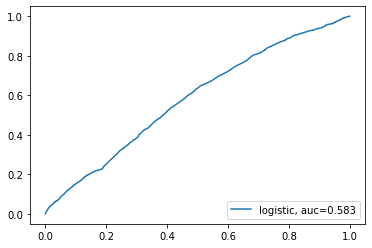

In [ ]:
#AUC
fpr, tpr, thresholds = roc_curve(test_woe['TARGET_LABEL_BAD=1'], probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test_woe['TARGET_LABEL_BAD=1'], 
                             y_score = probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="logistic, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random Forest dataset

In [70]:
cleantrain = pd.read_csv('train_clean.csv')

In [72]:
cleantrain.loc[:,'MARITAL_STATUS']=cleantrain.loc[:,'MARITAL_STATUS'].astype(str)
cleantrain.loc[:,'STATE_OF_BIRTH']=cleantrain.loc[:,'STATE_OF_BIRTH'].astype(str)
cleantrain.loc[:,'RESIDENCIAL_STATE']=cleantrain.loc[:,'RESIDENCIAL_STATE'].astype(str)
cleantrain.loc[:,'RESIDENCIAL_CITY']=cleantrain.loc[:,'RESIDENCIAL_CITY'].astype(str)
cleantrain.loc[:,'RESIDENCIAL_BOROUGH']=cleantrain.loc[:,'RESIDENCIAL_BOROUGH'].astype(str)
cleantrain.loc[:,'RESIDENCE_TYPE']=cleantrain.loc[:,'RESIDENCE_TYPE'].astype(str)
cleantrain.loc[:,'RESIDENCIAL_ZIP_3']=cleantrain.loc[:,'RESIDENCIAL_ZIP_3'].astype(str)

In [71]:
cleantest = pd.read_csv('test_clean.csv')

In [73]:
cleantest.loc[:,'MARITAL_STATUS']=cleantest.loc[:,'MARITAL_STATUS'].astype(str)
cleantest.loc[:,'STATE_OF_BIRTH']=cleantest.loc[:,'STATE_OF_BIRTH'].astype(str)
cleantest.loc[:,'RESIDENCIAL_STATE']=cleantest.loc[:,'RESIDENCIAL_STATE'].astype(str)
cleantest.loc[:,'RESIDENCIAL_CITY']=cleantest.loc[:,'RESIDENCIAL_CITY'].astype(str)
cleantest.loc[:,'RESIDENCIAL_BOROUGH']=cleantest.loc[:,'RESIDENCIAL_BOROUGH'].astype(str)
cleantest.loc[:,'RESIDENCE_TYPE']=cleantest.loc[:,'RESIDENCE_TYPE'].astype(str)
cleantest.loc[:,'RESIDENCIAL_ZIP_3']=cleantest.loc[:,'RESIDENCIAL_ZIP_3'].astype(str)

When we first time clean the dataset, we took the random forest into account. We divided the crazy amount of categorical variables' categories into smaller amount of categories that make much more sense. In this case, we do not need to specifically do another data cleaning just for the random forest, all we need to do here is making sure the training and test data looks fine, then apply the dummy variables to it.

In [74]:
cleantrain.describe(include='all')

,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,TOTAL_INCOME,TOTAL_BANKING_ACCOUNTS,TOTAL_TYPE_OF_CARDS
count,33522.000000,33522.000000,33522.000000,33522,33522.000000,33522,33522.000000,33522,33522,33522,33522.000000,33522,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522,33522.000000,33522.000000,33522.000000,33522.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,3,4,6,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,3,NaN,2,NaN,2,2,3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,20729,NaN,17394,NaN,21692,23385,16443,NaN,29201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13597,NaN,NaN,NaN,NaN
mean,12.883480,1.006623,0.620607,NaN,0.631824,NaN,0.955910,NaN,NaN,NaN,0.837032,NaN,9.108138,0.806097,709.721933,11.760512,0.105751,0.092864,0.001253,0.001492,0.001999,0.355587,0.355587,607.105483,0.331543,0.438220,0.268242,1.170843,42.986099,NaN,0.261977,721.482444,0.711175,0.203359
std,6.616225,0.081110,0.485243,NaN,1.096871,NaN,0.205299,NaN,NaN,NaN,0.369342,NaN,9.704732,0.395359,689.427599,64.932670,0.307524,0.290247,0.035375,0.038592,0.044663,0.479259,0.479259,3860.848213,0.470775,0.496176,0.443051,0.438333,14.917561,NaN,0.439717,689.720611,0.958517,0.510172
min,1.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,NaN,0.000000,69.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31.000000,NaN,0.000000,368.000000,0.000000,0.000000
50%,10.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,NaN,0.000000,500.000000,0.000000,0.000000
75%,15.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,13.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,53.000000,NaN,1.000000,800.000000,2.000000,0.000000


In [75]:
cleantest.describe(include='all')

,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TARGET_LABEL_BAD=1,TOTAL_INCOME,TOTAL_BANKING_ACCOUNTS,TOTAL_TYPE_OF_CARDS
count,15000.000000,15000.000000,15000.000000,15000,15000.000000,15000,15000.000000,15000,15000,15000,15000.000000,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000.000000,15000.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,3,4,6,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,3,NaN,2,NaN,2,2,3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,9220,NaN,7713,NaN,9566,11725,9801,NaN,13118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6069,NaN,NaN,NaN,NaN
mean,12.889600,1.005933,0.612133,NaN,0.634267,NaN,0.958133,NaN,NaN,NaN,0.837667,NaN,9.457333,0.798800,799.874569,44.416593,0.111533,0.099333,0.001000,0.002133,0.002200,0.358000,0.358000,2.137884e+03,0.337533,0.442267,0.268533,1.169867,43.407867,NaN,0.260800,844.291162,0.716000,0.216200
std,6.597276,0.076802,0.487280,NaN,1.231777,NaN,0.200291,NaN,NaN,NaN,0.368769,NaN,10.242036,0.400911,3412.383497,1599.998798,0.314802,0.299119,0.031608,0.046140,0.046854,0.480123,0.480123,2.027787e+04,0.472884,0.496672,0.443211,0.438587,15.071138,NaN,0.439086,3768.966713,0.960246,0.523331
min,1.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,17.000000,NaN,0.000000,60.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,32.000000,NaN,0.000000,372.000000,0.000000,0.000000
50%,10.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,42.000000,NaN,0.000000,510.000000,0.000000,0.000000
75%,15.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,14.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,54.000000,NaN,1.000000,826.240000,2.000000,0.000000


The data looks good, all the variables with categories more than two have string values, now we are able to apply the dummies.

In [76]:
rf_train=pd.get_dummies(cleantrain,drop_first=True)
rf_test=pd.get_dummies(cleantest,drop_first=True)

In [77]:
rf_train.describe(include='all')

,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1,TOTAL_INCOME,TOTAL_BANKING_ACCOUNTS,TOTAL_TYPE_OF_CARDS,MARITAL_STATUS_2,MARITAL_STATUS_3,STATE_OF_BIRTH_2,STATE_OF_BIRTH_3,RESIDENCIAL_STATE_2,RESIDENCIAL_STATE_3,RESIDENCIAL_CITY_2,RESIDENCIAL_CITY_3,RESIDENCIAL_CITY_4,RESIDENCIAL_BOROUGH_2,RESIDENCIAL_BOROUGH_3,RESIDENCIAL_BOROUGH_4,RESIDENCIAL_BOROUGH_5,RESIDENCIAL_BOROUGH_6,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,RESIDENCIAL_ZIP_3_2,RESIDENCIAL_ZIP_3_3,RESIDENCIAL_ZIP_3_4
count,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000
mean,12.883480,1.006623,0.620607,0.631824,0.955910,0.837032,9.108138,0.806097,709.721933,11.760512,0.105751,0.092864,0.001253,0.001492,0.001999,0.355587,0.355587,607.105483,0.331543,0.438220,0.268242,1.170843,42.986099,0.261977,721.482444,0.711175,0.203359,0.071893,0.618370,0.518883,0.325667,0.647097,0.199570,0.697602,0.050206,0.025267,0.219527,0.490514,0.081529,0.076636,0.082573,0.078217,0.003073,0.006384,0.041227,0.405614,0.353111,0.144323
std,6.616225,0.081110,0.485243,1.096871,0.205299,0.369342,9.704732,0.395359,689.427599,64.932670,0.307524,0.290247,0.035375,0.038592,0.044663,0.479259,0.479259,3860.848213,0.470775,0.496176,0.443051,0.438333,14.917561,0.439717,689.720611,0.958517,0.510172,0.258315,0.485794,0.499651,0.468630,0.477880,0.399683,0.459304,0.218373,0.156937,0.413933,0.499917,0.273649,0.266017,0.275239,0.268517,0.055347,0.079645,0.198817,0.491018,0.477944,0.351422
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31.000000,0.000000,368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,0.000000,500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,53.000000,1.000000,800.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0000

In [78]:
rf_test.describe(include='all')

,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1,TOTAL_INCOME,TOTAL_BANKING_ACCOUNTS,TOTAL_TYPE_OF_CARDS,MARITAL_STATUS_2,MARITAL_STATUS_3,STATE_OF_BIRTH_2,STATE_OF_BIRTH_3,RESIDENCIAL_STATE_2,RESIDENCIAL_STATE_3,RESIDENCIAL_CITY_2,RESIDENCIAL_CITY_3,RESIDENCIAL_CITY_4,RESIDENCIAL_BOROUGH_2,RESIDENCIAL_BOROUGH_3,RESIDENCIAL_BOROUGH_4,RESIDENCIAL_BOROUGH_5,RESIDENCIAL_BOROUGH_6,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,RESIDENCIAL_ZIP_3_2,RESIDENCIAL_ZIP_3_3,RESIDENCIAL_ZIP_3_4
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,12.889600,1.005933,0.612133,0.634267,0.958133,0.837667,9.457333,0.798800,799.874569,44.416593,0.111533,0.099333,0.001000,0.002133,0.002200,0.358000,0.358000,2.137884e+03,0.337533,0.442267,0.268533,1.169867,43.407867,0.260800,844.291162,0.716000,0.216200,0.076000,0.614667,0.514200,0.328867,0.637733,0.204400,0.781667,0.038333,0.016000,0.17860,0.653400,0.049400,0.041467,0.054533,0.079000,0.002467,0.005800,0.038200,0.404600,0.352933,0.147800
std,6.597276,0.076802,0.487280,1.231777,0.200291,0.368769,10.242036,0.400911,3412.383497,1599.998798,0.314802,0.299119,0.031608,0.046140,0.046854,0.480123,0.480123,2.027787e+04,0.472884,0.496672,0.443211,0.438587,15.071138,0.439086,3768.966713,0.960246,0.523331,0.265007,0.486690,0.499815,0.469817,0.480671,0.403276,0.413129,0.192006,0.125479,0.38303,0.475903,0.216709,0.199374,0.227075,0.269748,0.049606,0.075939,0.191685,0.490831,0.477898,0.354913
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,17.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,32.000000,0.000000,372.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,42.000000,0.000000,510.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,54.000000,1.000000,826.240000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
default_rf = RandomForestClassifier(n_estimators=3000, # Number of trees to train
                       criterion='entropy', # How to train the trees. Also supports gini.
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=0.0001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.00001, # Minimum impurity decrease. This is 10^-4.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=2, # Parallel processing. Set to the number of cores you have. Watch your RAM!!
                       random_state=251238783, # Seed
                       verbose=0, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced' # Balance the classes.
                                    )

### CV grid search

In [79]:
param_grid_rf = dict({'n_estimators': [2000,3000,4000,5000,6000]})

In [80]:
val_train_rf = rf_train.sample(frac = 0.2, random_state = 251238783)

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
GridRF = GridSearchCV(default_rf,        # Original XGB. 
                       param_grid_rf,          # Parameter grid
                       cv = 5,              # Number of cross-validation folds.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = 2,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 0          # If to show what it is doing.
                      )

In [83]:
val_train_rf_x=val_train_rf.drop(columns='TARGET_LABEL_BAD=1')
val_train_rf_y=val_train_rf.loc[:,'TARGET_LABEL_BAD=1']

In [84]:
GridRF.fit(val_train_rf_x, val_train_rf_y)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              min_impurity_decrease=1e-05,
                                              min_samples_leaf=0.0001,
                                              n_estimators=3000, n_jobs=2,
                                              oob_score=True,
                                              random_state=251238783),
             n_jobs=2,
             param_grid={'n_estimators': [2000, 3000, 4000, 5000, 6000]},
             refit=False, scoring='roc_auc')

In [86]:
print('The best AUC is %.3f' % GridRF.best_score_)
GridRF.best_params_


The best AUC is 0.836


{'n_estimators': 3000}

### Fit the model

In [87]:
rf_train_x=rf_train.drop(columns='TARGET_LABEL_BAD=1')
rf_train_y=rf_train.loc[:,'TARGET_LABEL_BAD=1']

In [88]:
rf_train_x.describe(include='all')

,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TOTAL_INCOME,TOTAL_BANKING_ACCOUNTS,TOTAL_TYPE_OF_CARDS,MARITAL_STATUS_2,MARITAL_STATUS_3,STATE_OF_BIRTH_2,STATE_OF_BIRTH_3,RESIDENCIAL_STATE_2,RESIDENCIAL_STATE_3,RESIDENCIAL_CITY_2,RESIDENCIAL_CITY_3,RESIDENCIAL_CITY_4,RESIDENCIAL_BOROUGH_2,RESIDENCIAL_BOROUGH_3,RESIDENCIAL_BOROUGH_4,RESIDENCIAL_BOROUGH_5,RESIDENCIAL_BOROUGH_6,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,RESIDENCIAL_ZIP_3_2,RESIDENCIAL_ZIP_3_3,RESIDENCIAL_ZIP_3_4
count,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000,33522.000000
mean,12.883480,1.006623,0.620607,0.631824,0.955910,0.837032,9.108138,0.806097,709.721933,11.760512,0.105751,0.092864,0.001253,0.001492,0.001999,0.355587,0.355587,607.105483,0.331543,0.438220,0.268242,1.170843,42.986099,721.482444,0.711175,0.203359,0.071893,0.618370,0.518883,0.325667,0.647097,0.199570,0.697602,0.050206,0.025267,0.219527,0.490514,0.081529,0.076636,0.082573,0.078217,0.003073,0.006384,0.041227,0.405614,0.353111,0.144323
std,6.616225,0.081110,0.485243,1.096871,0.205299,0.369342,9.704732,0.395359,689.427599,64.932670,0.307524,0.290247,0.035375,0.038592,0.044663,0.479259,0.479259,3860.848213,0.470775,0.496176,0.443051,0.438333,14.917561,689.720611,0.958517,0.510172,0.258315,0.485794,0.499651,0.468630,0.477880,0.399683,0.459304,0.218373,0.156937,0.413933,0.499917,0.273649,0.266017,0.275239,0.268517,0.055347,0.079645,0.198817,0.491018,0.477944,0.351422
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31.000000,368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,53.000000,800.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.

In [89]:
default_rf.fit(rf_train_x, # X 
               rf_train_y    # y
                )  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_impurity_decrease=1e-05, min_samples_leaf=0.0001,
                       n_estimators=3000, n_jobs=2, oob_score=True,
                       random_state=251238783)

In [90]:
rf_test_x=rf_test.drop(columns='TARGET_LABEL_BAD=1')
rf_test_y=rf_test.loc[:,'TARGET_LABEL_BAD=1']

rf_pred_class_test = default_rf.predict(rf_test_x)
rf_probs_test = default_rf.predict_proba(rf_test_x)

In [5]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

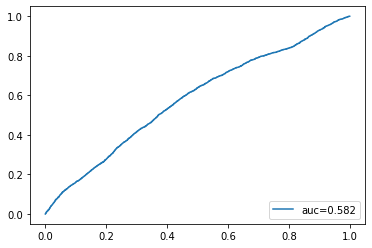

In [91]:
fpr, tpr, thresholds = roc_curve(rf_test['TARGET_LABEL_BAD=1'], rf_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = rf_test['TARGET_LABEL_BAD=1'], 
                             y_score = rf_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

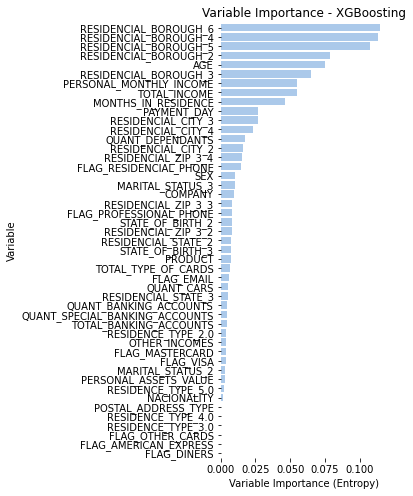

In [115]:
importances = default_rf.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[rf_train_x.columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

### XGBoosting

For this part, we can directly took the dataset that we used for Random Forest to model

In [93]:
from xgboost import XGBClassifier

In [104]:
XGB_default = XGBClassifier(max_depth=2,                 # Depth of each tree
                            learning_rate=0.15,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=150,        # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=0,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            #n_jobs=8,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights. G / B
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=251238783,        # Seed
                            missing=None,                 # How are nulls encoded?
                            tree_method='gpu_hist',       # How to train the trees?
                            gpu_id=0,                      # With which GPU? 
                            use_label_encoder=False
                            )

In [95]:
param_gridXG = dict({'n_estimators': [50, 100, 150],
                   'max_depth': [2, 3, 4],
                 'learning_rate' : [0.01, 0.05, 0.1, 0.15]
                  })

In [96]:
GridXGB = GridSearchCV(XGB_default,        # Original XGB. 
                       param_gridXG,          # Parameter grid
                       cv = 5,              # Number of cross-validation folds.  
                       scoring = 'roc_auc', # How to rank outputs.
                       #n_jobs = 8,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1,   # If to show what it is doing.
                      )

In [97]:
val_train_rf_y=val_train_rf_y.astype(int)

In [98]:
GridXGB.fit(val_train_rf_x, val_train_rf_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(gamma=0.001, gpu_id=0, n_estimators=150,
                                     random_state=251238783, reg_alpha=1,
                                     reg_lambda=0, subsample=0.632,
                                     tree_method='gpu_hist',
                                     use_label_encoder=False, verbosity=0),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             refit=False, scoring='roc_auc', verbose=1)

In [99]:
print('The best AUC is %.3f' % GridXGB.best_score_)
GridXGB.best_params_

The best AUC is 0.854


{'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 150}

In [100]:
param_gridXG = dict({'n_estimators': [150],
                   'max_depth': [2],
                 'learning_rate' : [0.15,0.2]
                  })

In [101]:
GridXGB.fit(val_train_rf_x, val_train_rf_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(gamma=0.001, gpu_id=0, n_estimators=150,
                                     random_state=251238783, reg_alpha=1,
                                     reg_lambda=0, subsample=0.632,
                                     tree_method='gpu_hist',
                                     use_label_encoder=False, verbosity=0),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             refit=False, scoring='roc_auc', verbose=1)

In [102]:
print('The best AUC is %.3f' % GridXGB.best_score_)
GridXGB.best_params_

The best AUC is 0.854


{'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 150}

Now we find our three best parameters: 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 150

In [108]:
XGB_final = XGBClassifier(max_depth=2,                 # Depth of each tree
                            learning_rate=0.15,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=150,        # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=0,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            #n_jobs=8,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights. G / B
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=251238783,        # Seed
                            missing=None,                 # How are nulls encoded?
                            tree_method='gpu_exact',       # How to train the trees?
                            gpu_id=0,                      # With which GPU? 
                            use_label_encoder=False
                            )

In [109]:
XGB_final.fit(rf_train_x, rf_train_y)

XGBClassifier(gamma=0.001, gpu_id=0, learning_rate=0.15, max_depth=2,
              n_estimators=150, random_state=251238783, reg_alpha=1,
              reg_lambda=0, subsample=0.632, tree_method='gpu_exact',
              use_label_encoder=False, verbosity=0)

In [112]:
rf_test_x=rf_test.drop(columns='TARGET_LABEL_BAD=1')
rf_test_y=rf_test.loc[:,'TARGET_LABEL_BAD=1']

XG_pred_class_test = XGB_final.predict(rf_test_x)
XG_probs_test = XGB_final.predict_proba(rf_test_x)

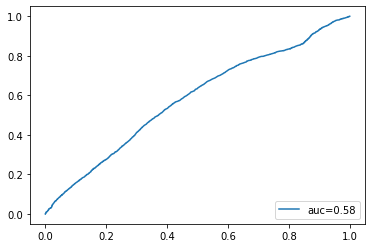

In [113]:
fpr, tpr, thresholds = roc_curve(rf_test['TARGET_LABEL_BAD=1'], XG_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = rf_test['TARGET_LABEL_BAD=1'], 
                             y_score = XG_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

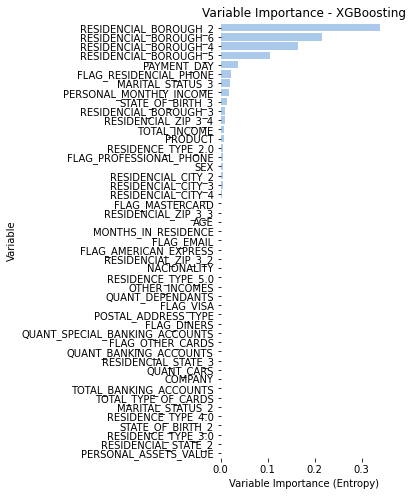

In [114]:
importances = XGB_final.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[rf_train_x.columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)